#1.Imports

In [ ]:
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00


In [ ]:
import ipdb

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505168 sha256=61c6f455c2bb4cfd70e25bf833cd5fd69d4329825bbca78e7428f00d9eba1683
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 55.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import jaccard_score
import datetime
from surprise import Dataset, Reader, SVD, SVDpp
from surprise import accuracy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from itertools import product
import heapq
from datasketch import MinHash, MinHashLSH
from random import randrange, uniform
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import train_test_split as surprise_train_test_split
import math
from implicit.als import AlternatingLeastSquares
import scipy.sparse as sparse
from sklearn.model_selection import KFold
from surprise import KNNBaseline
import random


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#2.See data and make the dataset

##2.1 Lastfm dataset

In [ ]:
lastfm_df = pd.read_csv('Last.fm_data.csv')
lastfm_df.head()

Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21

In [ ]:
lastfm_df.drop(['Unnamed: 0'], inplace=True, axis=1)


In [ ]:
# Standardize track name and artist columns
lastfm_df['Track'] = lastfm_df['Track'].str.lower().str.strip()
lastfm_df['Artist'] = lastfm_df['Artist'].str.lower().str.strip()

In [ ]:
#make lower case the columns names
lastfm_df.columns=lastfm_df.columns.str.lower()

##2.2 Spotify Dataset

In [ ]:
spotify_df = pd.read_csv('dataset.csv')
spotify_df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [ ]:
lastfm_df.columns

Index(['username', 'artist', 'track', 'album', 'date', 'time'], dtype='object')

In [ ]:
spotify_df.drop(['Unnamed: 0'], inplace=True, axis=1)
(spotify_df.head())

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [ ]:
spotify_df['track_name'] = spotify_df['track_name'].str.lower().str.strip()
spotify_df['artists'] = spotify_df['artists'].str.lower().str.strip()

##2.3 See if the datasets have common tracks to merge them

In [ ]:
#find common tracks on both dataset and print also the artists on common tracks


common_tracks = set(lastfm_df['track']).intersection(set(spotify_df['track_name']))
if common_tracks:
    print(f"Common tracks: {common_tracks}")
else:
    print("No common tracks found.")

print(len(common_tracks))




Common tracks: {'vals de rodrigues', 'sign', 'mind games', 'dissolved girl', 'lido', 'tonto rides the gain', 'long nights', 'bad liar', 'just a dream', 'note to self', 'white trash', 'alone together', 'despacito', 'naughty naughty', 'dance again', 'get out', 'locust', 'wasting', 'strangers when we meet', "he's a pirate", 'flying high', 'god is a dj', 'got to be real', 'otoño', 'baby beluga', 'westside', 'paradox', 'silver spoon', 'how low can you go', 'the snake', 'are you ready', 'shot in the dark', 'reality', 'pain', 'what if', 'radar', 'any colour you like', 'swan', 'blaze', 'welcome to the jungle', 'is it any wonder?', 'roar', 'hang loose', 'lost in you', 'ex cathedra', 'blasteroid', '6 underground', 'summer nights', 'walk on the wild side', 'stargaze', 'havana (feat. young thug)', 'drivers license', 'lose somebody', 'lost in thought', 'push', 'us against the world', 'best day of my life', 'pocky boy', 'lonely', 'dreadlock holiday', 'yes sir, i can boogie', 'brightest lights (feat.

##2.4 groub_by all columns except genre

In [ ]:
spotify_df=spotify_df.groupby(['track_id','artists','album_name', 'track_name'])['track_genre'].apply(list).reset_index()
#rename track_genre column as track_genres
spotify_df.rename(columns={'track_genre': 'track_genres'}, inplace=True)


In [ ]:
# Merge directly on track and artist names (inner join keeps only matching rows)
combined_df = pd.merge(lastfm_df, spotify_df, left_on=['track','artist','album'], right_on=['track_name','artists','album_name'], how='inner')

#keep index
#combined_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
combined_df.head(15)


username             artist                              track  \
0   Babs_05              bicep                           apricots   
1   Babs_05  christian löffler                              ronda   
2   Babs_05           dua lipa                    don't start now   
3   Babs_05             eminem                            rap god   
4   Babs_05            caesars                        jerk it out   
5   Babs_05      groove armada                       superstylin'   
6   Babs_05       bronski beat                      smalltown boy   
7   Babs_05        nik kershaw  i won't let the sun go down on me   
8   Babs_05           autechre                               bike   
9   Babs_05         marshmello                              alone   
10  Babs_05         marshmello                              alone   
11  Babs_05            the him                             always   
12  Babs_05            the him                             always   
13  Babs_05        busy signal                    jamaica jamaica   
14  Babs_05    backstreet boys                 i want it that way   

                                album         date    time  \
0                            Apricots  19 Jan 2021   18:26   
1                               Ronda  19 Jan 2021   17:24   
2                     Don't Start Now  30 Jan 2021   16:25   
3   The Marshall Mathers LP2 (Deluxe)  30 Jan 2021   16:19   
4                         Jerk It Out  29 Jan 2021   15:26   
5   Goodbye Country (Hello Nightclub)  29 Jan 2021   14:29   
6                  The Age of Consent  29 Jan 2021   13:42   
7                        Human Racing  29 Jan 2021   13:17   
8                          Incunabula  29 Jan 2021   11:17   
9                               Alone  31 Jan 2021   16:26   
10                              Alone  31 Jan 2021   16:22   
11                             Always  31 Jan 2021   13:51   
12                             Always  31 Jan 2021   13:47   
13                Jamaica Rock Riddim  29 Jan 2021   22:19   
14                         Millennium  28 Jan 2021   13:24   

                  track_id            artists  \
0   73X9X7kDgsm4YeHpc8prf6              bicep   
1   4WyhOKXtCkNVcgfTBpYaxm  christian löffler   
2   6WrI0LAC5M1Rw2MnX2ZvEg           dua lipa   
3   6or1bKJiZ06IlK0vFvY75k             eminem   
4   1bx7OUl2UmAnA5oZkm9If7            caesars   
5   2yWyFT6bW1Rd9cjVvYi4v8      groove armada   
6   5vmRQ3zELMLUQPo2FLQ76x       bronski beat   
7   65YtzNpiPhGVzg6GPzkotn        nik kershaw   
8   4v9rHzCDgQXbDdB7t4Nwcz           autechre   
9   3MEYFivt6bilQ9q9mFWZ4g         marshmello   
10  3MEYFivt6bilQ9q9mFWZ4g         marshmello   
11  5poevcmYCOZ8uZQnUuOPxC            the him   
12  5poevcmYCOZ8uZQnUuOPxC            the him   
13  2yALcQdbRmFwc0a6oBhViJ        busy signal   
14  47BBI51FKFwOMlIiX6m8ya    backstreet boys   

                           album_name                         track_name  \
0                            Apricots                           apricots   
1                               Ronda                              ronda   
2                     Don't Start Now                    don't start now   
3   The Marshall Mathers LP2 (Deluxe)                            rap god   
4                         Jerk It Out                        jerk it out   
5   Goodbye Country (Hello Nightclub)                       superstylin'   
6                  The Age of Consent                      smalltown boy   
7                        Human Racing  i won't let the sun go down on me   
8                          Incunabula                               bike   
9                               Alone                              alone   
10                              Alone                              alone   
11                             Always                             always   
12                             Always                             always   
13                Jamaica Rock Riddim                   

In [ ]:
# prompt: find lines that all the features are the same except genre , and keep only one line ,with the different genres

combined_df =combined_df.drop_duplicates(subset=['username', 'track_name', 'artists', 'album_name','track_id'], keep='first')

#keep theindex
combined_df.reset_index(drop=True, inplace=True)

#If you want to keep only the first occurence of a duplicate,  use keep = 'first'
#If you want to keep only the last occurence of a duplicate, use keep = 'last'
#If you want to drop all the duplicates, use keep = False

In [ ]:
combined_df.shape

(7608, 11)

In [ ]:
#see how many different users do we have
unique_users = combined_df['username'].unique()
print(unique_users)
print(len(unique_users))

['Babs_05' 'franhale' 'eartle' 'massdosage' 'Knapster01' 'jonocole'
 'isaac' 'lobsterclaw' 'jajo' 'mremond' 'Orlenay']
11


In [ ]:
combined_df.head()

username             artist            track  \
0  Babs_05              bicep         apricots   
1  Babs_05  christian löffler            ronda   
2  Babs_05           dua lipa  don't start now   
3  Babs_05             eminem          rap god   
4  Babs_05            caesars      jerk it out   

                               album         date    time  \
0                           Apricots  19 Jan 2021   18:26   
1                              Ronda  19 Jan 2021   17:24   
2                    Don't Start Now  30 Jan 2021   16:25   
3  The Marshall Mathers LP2 (Deluxe)  30 Jan 2021   16:19   
4                        Jerk It Out  29 Jan 2021   15:26   

                 track_id            artists  \
0  73X9X7kDgsm4YeHpc8prf6              bicep   
1  4WyhOKXtCkNVcgfTBpYaxm  christian löffler   
2  6WrI0LAC5M1Rw2MnX2ZvEg           dua lipa   
3  6or1bKJiZ06IlK0vFvY75k             eminem   
4  1bx7OUl2UmAnA5oZkm9If7            caesars   

                          album_name       track_name  \
0                           Apricots         apricots   
1                              Ronda            ronda   
2                    Don't Start Now  don't start now   
3  The Marshall Mathers LP2 (Deluxe)          rap god   
4                        Jerk It Out      jerk it out   

                                        track_genres  
0                                          [ambient]  
1  [ambient, electronic, french, minimal-techno, ...  
2                                            [dance]  
3                                          [hip-hop]  
4                                          [swedish]

#3.Data cleaning

##3.1 See data type for each column

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      7608 non-null   object
 1   artist        7608 non-null   object
 2   track         7608 non-null   object
 3   album         7608 non-null   object
 4   date          7608 non-null   object
 5   time          7608 non-null   object
 6   track_id      7608 non-null   object
 7   artists       7608 non-null   object
 8   album_name    7608 non-null   object
 9   track_name    7608 non-null   object
 10  track_genres  7608 non-null   object
dtypes: object(11)
memory usage: 653.9+ KB


In [ ]:
combined_df.columns

Index(['username', 'artist', 'track', 'album', 'date', 'time', 'track_id',
       'artists', 'album_name', 'track_name', 'track_genres'],
      dtype='object')

In [ ]:
combined_df.head()

username             artist            track  \
0  Babs_05              bicep         apricots   
1  Babs_05  christian löffler            ronda   
2  Babs_05           dua lipa  don't start now   
3  Babs_05             eminem          rap god   
4  Babs_05            caesars      jerk it out   

                               album         date    time  \
0                           Apricots  19 Jan 2021   18:26   
1                              Ronda  19 Jan 2021   17:24   
2                    Don't Start Now  30 Jan 2021   16:25   
3  The Marshall Mathers LP2 (Deluxe)  30 Jan 2021   16:19   
4                        Jerk It Out  29 Jan 2021   15:26   

                 track_id            artists  \
0  73X9X7kDgsm4YeHpc8prf6              bicep   
1  4WyhOKXtCkNVcgfTBpYaxm  christian löffler   
2  6WrI0LAC5M1Rw2MnX2ZvEg           dua lipa   
3  6or1bKJiZ06IlK0vFvY75k             eminem   
4  1bx7OUl2UmAnA5oZkm9If7            caesars   

                          album_name       track_name  \
0                           Apricots         apricots   
1                              Ronda            ronda   
2                    Don't Start Now  don't start now   
3  The Marshall Mathers LP2 (Deluxe)          rap god   
4                        Jerk It Out      jerk it out   

                                        track_genres  
0                                          [ambient]  
1  [ambient, electronic, french, minimal-techno, ...  
2                                            [dance]  
3                                          [hip-hop]  
4                                          [swedish]

In [ ]:
combined_df.shape

(7608, 11)

In [ ]:
#check if the columns are the same artist-artists, track-track_name, album-album_name
print(combined_df['artist'].equals(combined_df['artists']))
print(combined_df['track'].equals(combined_df['track_name']))
print(combined_df['album'].equals(combined_df['album_name']))


True
True
True


In [ ]:
#delete the same columns
combined_df.drop(['track','artist','album'], axis=1, inplace=True)

In [ ]:
combined_df.shape

(7608, 8)

In [ ]:
#convert to lower case
combined_df.columns=combined_df.columns.str.lower()

In [ ]:
#find only the int columns
int_cols=combined_df.columns[(combined_df.dtypes == 'int64') | (combined_df.dtypes=='int32')]

#convert the int cols to float
combined_df[int_cols] = combined_df[int_cols].astype(float)


In [ ]:
combined_df.shape

(7608, 8)

##3.2 Handling duplicates

In [ ]:
combined_df['track_genres'] = combined_df['track_genres'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
# Finding duplicate rows (keeping all instances)
duplicate_rows = combined_df[combined_df.duplicated(keep=False)]
duplicate_rows_index=duplicate_rows.index
print(duplicate_rows_index)

Index([], dtype='int64')


In [ ]:
combined_df= combined_df.drop(duplicate_rows_index)

In [ ]:
combined_df.shape

(7608, 8)

##3.3 Fix typo and dtypes of columns

In [ ]:
combined_df = combined_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)  # Normalize strings

<ipython-input-36-81d838c02ccb>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)  # Normalize strings


In [ ]:
combined_df.shape

(7608, 8)

In [ ]:
combined_df.head()

username         date   time                track_id            artists  \
0  babs_05  19 jan 2021  18:26  73x9x7kdgsm4yehpc8prf6              bicep   
1  babs_05  19 jan 2021  17:24  4wyhokxtcknvcgftbpyaxm  christian löffler   
2  babs_05  30 jan 2021  16:25  6wri0lac5m1rw2mnx2zveg           dua lipa   
3  babs_05  30 jan 2021  16:19  6or1bkjiz06ilk0vfvy75k             eminem   
4  babs_05  29 jan 2021  15:26  1bx7oul2umana5ozkm9if7            caesars   

                          album_name       track_name  \
0                           apricots         apricots   
1                              ronda            ronda   
2                    don't start now  don't start now   
3  the marshall mathers lp2 (deluxe)          rap god   
4                        jerk it out      jerk it out   

                                        track_genres  
0                                         (ambient,)  
1  (ambient, electronic, french, minimal-techno, ...  
2                                           (dance,)  
3                                         (hip-hop,)  
4                                         (swedish,)

##3.3 Complete the rating column

In [ ]:
#use popularity to make rating column
#max_popularity=combined_df['popularity'].max()
#min_popularity=combined_df['popularity'].min()
#scale the ratings from 1-5
#combined_df['rating']=1+4*(combined_df['popularity']-min_popularity)/(max_popularity-min_popularity)
#combined_df['rating']=combined_df['rating'].round(2)


In [ ]:
#find all the lines with the same values in all columns except the column track_genre
# Columns to compare (excluding 'track_genre' if it existed)
#comparison_columns = combined_df.columns.difference(['track_genre']).tolist()

# Group rows with identical features and assign random ratings
#unique_groups = combined_df.groupby(comparison_columns).ngroup()  # Assign group IDs
#random_ratings = {group: round(uniform(1, 5),2) for group in unique_groups.unique()}  # Random rating for each group

# Add the rating column
#combined_df['rating'] = unique_groups.map(random_ratings)

#ratings in the other lines ecluded lines , that are in the unique_groups
#if combined_df['rating'].isna().any():
#    combined_df.loc[combined_df['rating'].isna(), 'rating'] =np.random.uniform(1, 5, size=combined_df['rating'].isna().sum()).round(2)

#combined_df.head()


In [ ]:
#combined_df['ratings'] = np.random.randint(1, 6, size=len(combined_df))
#combined_df.head()

##3.4 Handling missing values

In [ ]:
#See where do we have null values
combined_df.isnull().sum()

username        0
date            0
time            0
track_id        0
artists         0
album_name      0
track_name      0
track_genres    0
dtype: int64

##3.5 Handling with column date

In [ ]:
combined_df.columns

Index(['username', 'date', 'time', 'track_id', 'artists', 'album_name',
       'track_name', 'track_genres'],
      dtype='object')

In [ ]:
#from date column keep only the year
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['date'] = combined_df['date'].dt.year
combined_df.rename(columns={'date': 'year'}, inplace=True)

<ipython-input-44-a94ad02c44ec>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['date'] = pd.to_datetime(combined_df['date'])


##3.6 Handling with column time

In [ ]:
combined_df['time'] = combined_df['time'].str.strip() #time has leading space
combined_df['time'] = pd.to_datetime(combined_df['time'], format='%H:%M').dt.time

##3.7 See the unique users

In [ ]:
#see how many unique users we have
unique_users = combined_df['username'].unique()
print(unique_users)
print(len(unique_users))

#['Babs_05' 'franhale' 'eartle' 'massdosage' 'Knapster01' 'jonocole'
 #'isaac' 'lobsterclaw' 'jajo' 'mremond' 'Orlenay']
#11

['babs_05' 'franhale' 'eartle' 'massdosage' 'knapster01' 'jonocole'
 'isaac' 'lobsterclaw' 'jajo' 'mremond' 'orlenay']
11


##3.8 Handling with column  track id

In [ ]:
df_id = pd.DataFrame(enumerate(combined_df['track_id'].unique())).rename({0: 'id', 1: 'track_id'}, axis=1)

In [ ]:
df_id.head()

id                track_id
0   0  73x9x7kdgsm4yehpc8prf6
1   1  4wyhokxtcknvcgftbpyaxm
2   2  6wri0lac5m1rw2mnx2zveg
3   3  6or1bkjiz06ilk0vfvy75k
4   4  1bx7oul2umana5ozkm9if7

In [ ]:
combined_df['track_id'].head()

0    73x9x7kdgsm4yehpc8prf6
1    4wyhokxtcknvcgftbpyaxm
2    6wri0lac5m1rw2mnx2zveg
3    6or1bkjiz06ilk0vfvy75k
4    1bx7oul2umana5ozkm9if7
Name: track_id, dtype: object

In [ ]:
combined_df=combined_df.merge(df_id)

In [ ]:
combined_df.head()

username  year      time                track_id            artists  \
0  babs_05  2021  18:26:00  73x9x7kdgsm4yehpc8prf6              bicep   
1  babs_05  2021  17:24:00  4wyhokxtcknvcgftbpyaxm  christian löffler   
2  babs_05  2021  16:25:00  6wri0lac5m1rw2mnx2zveg           dua lipa   
3  babs_05  2021  16:19:00  6or1bkjiz06ilk0vfvy75k             eminem   
4  babs_05  2021  15:26:00  1bx7oul2umana5ozkm9if7            caesars   

                          album_name       track_name  \
0                           apricots         apricots   
1                              ronda            ronda   
2                    don't start now  don't start now   
3  the marshall mathers lp2 (deluxe)          rap god   
4                        jerk it out      jerk it out   

                                        track_genres  id  
0                                         (ambient,)   0  
1  (ambient, electronic, french, minimal-techno, ...   1  
2                                           (dance,)   2  
3                                         (hip-hop,)   3  
4                                         (swedish,)   4

In [ ]:
combined_df['id'][0:5]

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [ ]:
#delete column track_id
combined_df.drop(['track_id'], axis=1, inplace=True)

In [ ]:
#rename id column to track_id
combined_df=combined_df.rename(columns={'id': 'track_id'})

##3.9 Handling with column genre

In [ ]:
#df=combined_df.copy()
#df.head()

In [ ]:
#df.shape

In [ ]:
#df_genre = pd.DataFrame(enumerate(df['track_genre'].unique())).rename({0: 'genre', 1: 'track_genre'}, axis=1)

In [ ]:
#merge
#df=df.merge(df_genre)

In [ ]:
#df.head()

In [ ]:
#df.shape

##3.10 Label Encoding for column 'artists', 'album_name' and 'username'

In [ ]:
le_artist = LabelEncoder()
combined_df['artists'] = le_artist.fit_transform(combined_df['artists'])

le_album = LabelEncoder()
combined_df['album_name'] = le_album.fit_transform(combined_df['album_name'])

le_username = LabelEncoder()
combined_df['username'] = le_album.fit_transform(combined_df['username'])


In [ ]:
combined_df['artists'][0:5]


0    152
1    274
2    399
3    435
4    233
Name: artists, dtype: int64

In [ ]:
combined_df['username'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: username, dtype: int64

In [ ]:
combined_df['album_name'][0:5]

0     167
1    1573
2     540
3    1932
4     990
Name: album_name, dtype: int64

##3.11 Info about the final data frame

In [ ]:
combined_df.head()

username  year      time  artists  album_name       track_name  \
0         0  2021  18:26:00      152         167         apricots   
1         0  2021  17:24:00      274        1573            ronda   
2         0  2021  16:25:00      399         540  don't start now   
3         0  2021  16:19:00      435        1932          rap god   
4         0  2021  15:26:00      233         990      jerk it out   

                                        track_genres  track_id  
0                                         (ambient,)         0  
1  (ambient, electronic, french, minimal-techno, ...         1  
2                                           (dance,)         2  
3                                         (hip-hop,)         3  
4                                         (swedish,)         4

In [ ]:
combined_df.dtypes

username         int64
year             int32
time            object
artists          int64
album_name       int64
track_name      object
track_genres    object
track_id         int64
dtype: object

In [ ]:
#find only the int columns
int_cols=combined_df.columns[(combined_df.dtypes == 'int64') | (combined_df.dtypes=='int32')]

#convert the int cols to float
combined_df[int_cols] = combined_df[int_cols].astype(float)


In [ ]:
combined_df.isna().sum()

username        0
year            0
time            0
artists         0
album_name      0
track_name      0
track_genres    0
track_id        0
dtype: int64

In [ ]:
combined_df.shape

(7608, 8)

In [ ]:
combined_df.head()

username    year      time  artists  album_name       track_name  \
0       0.0  2021.0  18:26:00    152.0       167.0         apricots   
1       0.0  2021.0  17:24:00    274.0      1573.0            ronda   
2       0.0  2021.0  16:25:00    399.0       540.0  don't start now   
3       0.0  2021.0  16:19:00    435.0      1932.0          rap god   
4       0.0  2021.0  15:26:00    233.0       990.0      jerk it out   

                                        track_genres  track_id  
0                                         (ambient,)       0.0  
1  (ambient, electronic, french, minimal-techno, ...       1.0  
2                                           (dance,)       2.0  
3                                         (hip-hop,)       3.0  
4                                         (swedish,)       4.0

In [ ]:
#save the combined_df in a xlsx
combined_df.to_excel('combined_df.xlsx', index=False)

In [ ]:

#from google.colab import files
#files.download('combined_df.xlsx')

#4.Groups making

In [ ]:
#import combined_df.xlsx
combined_df = pd.read_excel('combined_df.xlsx')

##4.1 User-Item matrix interaction

In [ ]:
combined_df.head()

username  year      time  artists  album_name       track_name  \
0         0  2021  18:26:00      152         167         apricots   
1         0  2021  17:24:00      274        1573            ronda   
2         0  2021  16:25:00      399         540  don't start now   
3         0  2021  16:19:00      435        1932          rap god   
4         0  2021  15:26:00      233         990      jerk it out   

                                        track_genres  track_id  
0                                       ('ambient',)         0  
1  ('ambient', 'electronic', 'french', 'minimal-t...         1  
2                                         ('dance',)         2  
3                                       ('hip-hop',)         3  
4                                       ('swedish',)         4

In [ ]:
#crosstab to see which user has listend which song
user_item_matrix = pd.crosstab(combined_df['username'], combined_df['track_id'])
user_item_matrix.head()

track_id  0     1     2     3     4     5     6     7     8     9     10    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            1     0     0     0     0     0     1     0     1     1     1   
2            1     1     1     0     0     0     1     0     1     0     0   
3            1     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  11    12    13    14    15    16    17    18    19    20    21    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     0     0     1     0     0     0     0     0     0   
2            0     1     1     1     1     1     1     0     1     1     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  22    23    24    25    26    27    28    29    30    31    32    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     0     0     0     0     1     0     0     0     1   
2            0     0     0     0     0     0     0     0     0     0     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  33    34    35    36    37    38    39    40    41    42    43    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     0     0     1     0     0     0     0     0     0   
2            0     0     0     0     1     0     1     0     0     0     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  44    45    46    47    48    49    50    51    52    53    54    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     1     1     0     0     1     1     0     0     0   
2            0     1     1     0     0     0     1     0     0     0     0   
3            0     0     1     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  55    56    57    58    59    60    61    62    63    64    65    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     1     1     0     0     0     0     0     0     1   
2            0     1     0     1     0     0     0     0     0     0     1   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  66    67    68    69    70    71    72    73    74    75    76    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            1     0     1     0     0     0     0     1     0     0     1   
2            1     0     1     1     1     1     0     1     0     1     0   
3            1     0     0     0     0     0     0     0     0     0     0   
4            1     0     0     0     0     0     0     0     0     0     0   

track_id  77    78    79    80    81    82    83    84    85    86    87    \
username                                                                     
0            1 

In [ ]:
np.random.seed(23)


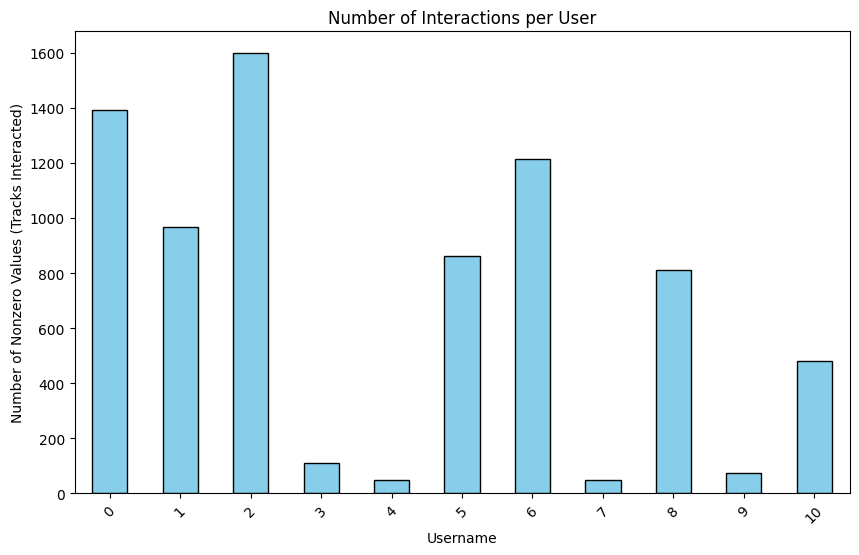

In [ ]:
import matplotlib.pyplot as plt

# Count nonzero values per row
nonzero_counts = user_item_matrix.gt(0).sum(axis=1)

# Plot as a bar chart
plt.figure(figsize=(10, 6))
nonzero_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Username")
plt.ylabel("Number of Nonzero Values (Tracks Interacted)")
plt.title("Number of Interactions per User")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# Define dimensions
num_users = user_item_matrix.shape[0]
num_tracks = user_item_matrix.shape[1]

#ones per user in a range 100-400
ones_per_user = random.randint(200,400)  # Approximate number of 1s per user
#print(ones_per_user)

# Initialize an empty DataFrame with zeros
rnd_user_item_matrix = pd.DataFrame(np.zeros((num_users, num_tracks), dtype=int))

# Assign 1s randomly for each user
for user in range(num_users):
    ones_indices = np.random.choice(num_tracks, ones_per_user, replace=False)  # Select random track indices
    rnd_user_item_matrix.iloc[user, ones_indices] = 1  # Set selected positions to 1

# Display a sample of the matrix
rnd_user_item_matrix.head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     1   
2     0     0     0     0     0     0     0     0     0     0     0     1   
3     0     0     0     0     0     0     0     0     1     0     0     0   
4     0     0     0     0     0     0     1     0     0     1     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     1     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     1     0     0     0     0     0     0     0     1   
2     0     0     1     0     0     0     1     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     1     0     0   
4     0     1     0     0     0     0     0     0     0     0     1     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     1     0     0     0     0     0     1     0     0   
1     0     0     0     0     0     1     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     1     0     0     0     1   
3     0     0     0     0     0     0     0     0     1     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     1     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     1     0     0     0     0     0     0     1     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     1     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     0     0     0     0     0     0     0     1     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     1     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     1     0     0     0     0     0     0     0   
1     0     1     0     0     0     0     0     0     0     0     0     0   
2     0     0     1     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     1     0     0     0     0     0     1   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     1     0     0     1     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     1     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [ ]:
# Randomly assign values between 1 and 5 to the 1s in the user-item matrix
#user_item_matrix_random = user_item_matrix.applymap(lambda x: np.random.randint(1, 6) if x == 1 else 0)
user_item_matrix_random=user_item_matrix.applymap(lambda x: np.random.randint(1, 6) if x == 1 else 0)

user_item_matrix_random.head()

<ipython-input-79-febefc452664>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_matrix_random=user_item_matrix.applymap(lambda x: np.random.randint(1, 6) if x == 1 else 0)


track_id  0     1     2     3     4     5     6     7     8     9     10    \
username                                                                     
0            5     1     2     5     4     3     2     3     3     2     5   
1            1     0     0     0     0     0     5     0     3     4     3   
2            5     4     1     0     0     0     3     0     4     0     0   
3            4     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  11    12    13    14    15    16    17    18    19    20    21    \
username                                                                     
0            5     3     1     2     3     5     3     2     5     5     1   
1            0     0     0     0     3     0     0     0     0     0     0   
2            0     4     5     3     1     4     3     0     1     5     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  22    23    24    25    26    27    28    29    30    31    32    \
username                                                                     
0            5     1     3     2     4     5     2     4     3     3     2   
1            0     0     0     0     0     0     5     0     0     0     3   
2            0     0     0     0     0     0     0     0     0     0     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  33    34    35    36    37    38    39    40    41    42    43    \
username                                                                     
0            3     1     1     5     5     3     4     1     4     3     4   
1            0     0     0     0     5     0     0     0     0     0     0   
2            0     0     0     0     1     0     3     0     0     0     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  44    45    46    47    48    49    50    51    52    53    54    \
username                                                                     
0            1     2     1     1     4     3     1     1     1     2     2   
1            0     0     1     2     0     0     2     5     0     0     0   
2            0     1     4     0     0     0     3     0     0     0     0   
3            0     0     3     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  55    56    57    58    59    60    61    62    63    64    65    \
username                                                                     
0            5     1     2     5     4     4     3     3     1     3     5   
1            0     0     5     5     0     0     0     0     0     0     3   
2            0     5     0     1     0     0     0     0     0     0     2   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  66    67    68    69    70    71    72    73    74    75    76    \
username                                                                     
0            3     5     2     2     4     1     1     1     4     3     4   
1            4     0     5     0     0     0     0     2     0     0     4   
2            4     0     4     1     2     4     0     2     0     2     0   
3            2     0     0     0     0     0     0     0     0     0     0   
4            3     0     0     0     0     0     0     0     0     0     0   

track_id  77    78    79    80    81    82    83    84    85    86    87    \
username                                                                     
0            3 

###4.1.1 SVD Model

In [ ]:
from surprise.model_selection import cross_validate
# Convert the user-item matrix to a long format for Surprise
user_item_long = user_item_matrix_random.stack().reset_index()
user_item_long.columns = ['user', 'item', 'rating']

#load the data inot surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_item_long, reader)
#print(data)

#split the data into training and test set
trainset, testset =surprise_train_test_split(data, test_size=0.2)

#train the svd model
model = SVD()

model.fit(trainset)

#predict issing values
predictions_svd = model.test(testset)

In [ ]:
#cross_validation
cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4251  1.4346  1.3969  1.4331  1.3972  1.4174  0.0169  
MAE (testset)     1.2420  1.2486  1.2236  1.2494  1.2252  1.2378  0.0112  
Fit time          0.78    0.75    0.88    0.40    0.37    0.64    0.21    
Test time         0.05    0.05    0.03    0.17    0.03    0.07    0.05    


{'test_rmse': array([1.42510479, 1.43462638, 1.39692518, 1.43306267, 1.39724328]),
 'test_mae': array([1.24199118, 1.24856015, 1.22363474, 1.24944593, 1.22516613]),
 'fit_time': (0.7762181758880615,
  0.751079797744751,
  0.882906436920166,
  0.4025752544403076,
  0.3681938648223877),
 'test_time': (0.050467491149902344,
  0.04724287986755371,
  0.03149271011352539,
  0.16638398170471191,
  0.029704570770263672)}

In [ ]:
#cross validate the model in kFolds
from surprise.model_selection import KFold
from surprise import accuracy
kFolds = KFold(n_splits=5, shuffle=True, random_state=42)
for i, (trainset, testset) in enumerate(kFolds.split(data)):
    model.fit(trainset)
    print(f"Fold:{i+1}")
    predictions_svd_KF = model.test(testset)
    accuracy.rmse(predictions_svd_KF, verbose=True)
    accuracy.mae(predictions_svd_KF, verbose=True)



Fold:1
RMSE: 1.4131
MAE:  1.2377
Fold:2
RMSE: 1.4132
MAE:  1.2376
Fold:3
RMSE: 1.4190
MAE:  1.2429
Fold:4
RMSE: 1.4248
MAE:  1.2441
Fold:5
RMSE: 1.4247
MAE:  1.2437


In [ ]:
#svd with GridSearchCV
from surprise.model_selection import GridSearchCV

param_grid={
    'n_factors':[50,100],
    'n_epochs':[10,20]
}

gs=GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# Best parameters
print("Best RMSE Score:", gs.best_score['rmse'])
print("Best Parameters:", gs.best_params['rmse'])

Best RMSE Score: 1.4147376778906111
Best Parameters: {'n_factors': 50, 'n_epochs': 20}


In [ ]:
#train final model with the best params
best_svd=SVD(**gs.best_params['rmse']) #unfold the best_svd's params
#trainset=data.build_full_trainset()
trainset, testset = surprise_train_test_split(data, test_size=0.2)
best_svd.fit(trainset)

predictions_best_svd=best_svd.test(testset)

In [ ]:
test_svd_df=pd.DataFrame(predictions_best_svd)
test_svd_df = test_svd_df.rename(columns={'uid':'userId', 'iid': 'songId',
                            'r_ui':'actual', 'est':'prediction'})

In [ ]:
test_svd_df.head()

userId  songId  actual  prediction                    details
0       5    1837     0.0    1.000000  {'was_impossible': False}
1      10    2038     0.0    1.000000  {'was_impossible': False}
2       7    1007     0.0    1.000000  {'was_impossible': False}
3       2     217     4.0    1.063642  {'was_impossible': False}
4       7    2351     0.0    1.000000  {'was_impossible': False}

In [ ]:
pred_df_best_svd= test_svd_df.pivot_table(index='userId',
                            columns='songId', values='prediction').fillna(0)


In [ ]:
pred_df_best_svd.head()

songId  0     1     2     3     5         6     8     9     11        12    \
userId                                                                       
0        0.0   1.0   0.0   0.0   1.0  1.219258   0.0   0.0   0.0  0.000000   
1        0.0   0.0   1.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   
2        0.0   0.0   0.0   0.0   0.0  1.846115   0.0   0.0   0.0  1.921325   
3        0.0   0.0   0.0   1.0   1.0  0.000000   0.0   0.0   1.0  0.000000   
4        0.0   0.0   1.0   0.0   0.0  0.000000   0.0   0.0   0.0  0.000000   

songId  13    14    15    16    17        18      19       20    22    23    \
userId                                                                        
0        0.0   0.0   0.0   1.0   0.0  0.000000  0.0000  1.27333   0.0   0.0   
1        0.0   0.0   1.0   0.0   0.0  0.000000  0.0000  1.00000   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0  2.217902  1.3042  0.00000   0.0   1.0   
3        0.0   1.0   1.0   0.0   0.0  1.000000  0.0000  0.00000   0.0   1.0   
4        0.0   0.0   1.0   0.0   0.0  0.000000  1.0000  1.00000   0.0   0.0   

songId      24        25        26    27    28    29    30        32    33    \
userId                                                                         
0       1.647507  0.000000  0.000000   0.0   0.0   0.0   1.0  1.912052   1.0   
1       1.000000  1.204177  0.000000   0.0   0.0   0.0   0.0  0.000000   1.0   
2       0.000000  0.000000  1.051256   0.0   0.0   0.0   0.0  0.000000   0.0   
3       0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0  1.000000   1.0   
4       0.000000  0.000000  0.000000   0.0   0.0   0.0   0.0  0.000000   1.0   

songId  34    35        36        37        38    39    41       42    \
userId                                                                  
0        0.0   0.0  0.000000  0.000000  0.000000   0.0   1.0  1.73621   
1        0.0   0.0  1.114788  1.922258  1.141666   1.0   0.0  1.00000   
2        0.0   0.0  0.000000  0.000000  0.000000   0.0   1.0  0.00000   
3        0.0   0.0  1.000000  1.000000  0.000000   0.0   1.0  0.00000   
4        0.0   0.0  0.000000  1.000000  0.000000   0.0   0.0  0.00000   

songId      43        45        46    47    48    49    50       51    \
userId                                                                  
0       0.000000  1.561907  0.000000   0.0   1.0   0.0   0.0  0.00000   
1       0.000000  0.000000  2.256026   0.0   0.0   1.0   0.0  3.13104   
2       2.095546  1.237894  0.000000   0.0   0.0   0.0   0.0  0.00000   
3       0.000000  0.000000  0.000000   1.0   1.0   1.0   0.0  0.00000   
4       0.000000  0.000000  0.000000   0.0   0.0   1.0   1.0  1.00000   

songId      52    53        54    56        57    58        59        61    \
userId                                                                       
0       0.000000   0.0  0.000000   0.0  0.000000   0.0  0.000000  1.969811   
1       0.000000   0.0  1.201835   0.0  0.000000   0.0  1.036199  0.000000   
2       1.291946   0.0  0.000000   0.0  1.527285   0.0  0.000000  0.000000   
3       0.000000   0.0  0.000000   0.0  0.000000   1.0  0.000000  0.000000   
4       0.000000   0.0  0.000000   1.0  0.000000   0.0  0.000000  0.000000   

songId  62        63    64    65    66    67        68    70    71    72    \
userId                                                                       
0        0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   1.0   0.0   0.0   
1        0.0  0.000000   0.0   0.0   0.0   0.0  1.345907   0.0   0.0   0.0   
2        0.0  1.207975   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   
3        1.0  1.000000   0.0   1.0   0.0   0.0  0.000000   0.0   1.0   0.0   
4        0.0  0.000000   0.0   0.0   0.0   0.0  0.000000   1.0   0.0   1.0   

songId  73    74    75        76    78    79    80        81       82    \
userId                                                                    
0        0.0   0.0   0.0  0.000000   0.0   0.0   0.0  1.738142  2.1409

In [ ]:
from collections import defaultdict

for pred in predictions_best_svd:
    uid, iid, true_r, est, _ =pred

    #scale the prediction in pred_df_best_svd  to be between 1 to 5
    pred_df_best_svd.loc[uid,iid] = round(min(max(est, 1), 5))  # Store predicted rating
#print(pred_dict)

In [ ]:
pred_df_best_svd.head()

songId  0     1     2     3     5     6     8     9     11    12    13    \
userId                                                                     
0        0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   
1        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   2.0   0.0   
3        0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

songId  14    15    16    17    18    19    20    22    23    24    25    \
userId                                                                     
0        0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   2.0   0.0   
1        0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   
2        0.0   0.0   0.0   0.0   2.0   1.0   0.0   0.0   1.0   0.0   0.0   
3        1.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   
4        0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   

songId  26    27    28    29    30    32    33    34    35    36    37    \
userId                                                                     
0        0.0   0.0   0.0   0.0   1.0   2.0   1.0   0.0   0.0   0.0   0.0   
1        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   2.0   
2        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3        0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   1.0   1.0   
4        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   

songId  38    39    41    42    43    45    46    47    48    49    50    \
userId                                                                     
0        0.0   0.0   1.0   2.0   0.0   2.0   0.0   0.0   1.0   0.0   0.0   
1        1.0   1.0   0.0   1.0   0.0   0.0   2.0   0.0   0.0   1.0   0.0   
2        0.0   0.0   1.0   0.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   
4        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   

songId  51    52    53    54    56    57    58    59    61    62    63    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   
1        3.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
2        0.0   1.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   1.0   
3        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   
4        1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

songId  64    65    66    67    68    70    71    72    73    74    75    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
1        0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3        0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
4        0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   1.0   

songId  76    78    79    80    81    82    83    84    85    86    87    \
userId                                                                     
0        0.0   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0   0.0   1.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   
3        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4        0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   

songId  88    89    91    92    93    94    95    96    98    99    100   \
userId                                                                     
0        0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   
1        0.0   0.0   1.0   1.0   0.0   0.

###4.1.2 Als Matrix Factorization

In [ ]:
# Φόρτωση δεδομένων
#combined_df = pd.read_excel("combined_df.xlsx")  # Διάβασε το dataset

# Δημιουργία user-item matrix
#user_item_matrix = pd.crosstab(combined_df['username'], combined_df['track_id'])

# Μετατροπή σε sparse matrix
sparse_matrix = sparse.csr_matrix(rnd_user_item_matrix.values)



# Training and test set for evry user
#every user has data on train and test set
train_data = []
test_data = []

for user in rnd_user_item_matrix.index:  #for every user
    user_ratings = rnd_user_item_matrix.loc[user]  #get each user's ratings
    rated_items = user_ratings[user_ratings > 0].index  #items that have rated

    if len(rated_items) < 2:
        continue  #if the user has rated only one item ignore

    train_items, test_items = train_test_split(rated_items, test_size=0.2, random_state=42)  #80%train - 20% test

    train_data.extend([(user, item) for item in train_items])
    test_data.extend([(user, item) for item in test_items])

#train matrix and test matrix
train_matrix = pd.DataFrame(0, index=rnd_user_item_matrix.index, columns=rnd_user_item_matrix.columns)
test_matrix = train_matrix.copy()

for user, item in train_data:
    train_matrix.loc[user, item] = rnd_user_item_matrix.loc[user, item]

for user, item in test_data:
    test_matrix.loc[user, item] = rnd_user_item_matrix.loc[user, item]

#convert in csr matrices for als algorithm
train_sparse = sparse.csr_matrix(train_matrix.values)
test_sparse = sparse.csr_matrix(test_matrix.values)

#parameters for als
factors = 50  #latent factors
regularization = 0.1
iterations = 20

#tarin als
als = AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
als.fit(train_sparse)

#predict
predictions_als, true_ratings = [], []

user_factors = als.user_factors
item_factors = als.item_factors

#scale prediction to be between 1-5
min_rating = np.min(user_factors @ item_factors.T)
max_rating = np.max(user_factors @ item_factors.T)



for user in range(train_matrix.shape[0]):
    user_items = test_sparse[user].indices  #items that user has rated in test set
    for item in user_items:
        if item < item_factors.shape[0]: #if item exist
            raw_pred_rating = np.dot(user_factors[user], item_factors[item]) #predict with the dot product
            true_rating = test_sparse[user, item]

            #scale prediction to be between 1-5
            scaled_prediction = 1 + (raw_pred_rating - min_rating) / (max_rating - min_rating) * 4
            print(f"Scaled_prediction:{scaled_prediction}")

            predictions_als.append(scaled_prediction)
            true_ratings.append(true_rating)

print(f"Predictions{predictions_als}")
print(f"True ratings{true_ratings}")

#compute rmse and mae
rmse = mean_squared_error(true_ratings, predictions_als)
mae = mean_absolute_error(true_ratings, predictions_als)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


/usr/local/lib/python3.11/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0085287569090724
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0103175370022655
Scaled_prediction:1.0103003699332476
Scaled_prediction:1.0085393525660038
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0087034869939089
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0048056347295642
Scaled_prediction:1.0099877687171102
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0025679916143417
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0032503865659237
Scaled_prediction:1.0102857053279877
Scaled_prediction:1.0032503865659237
S

In [ ]:
#recommnd for every user
def recommend_for_user(user_id):
  if user_id < user_factors.shape[0]:
      recommendations = als.recommend(user_id, sparse_matrix[user_id], N=5)
      print(f"Top 5 Recommendations for user:{user_id}")
      print(recommendations)
  else:
      print("Λάθος user_id: Εκτός ορίων!")

In [ ]:
#for every user
for user_id in range(user_factors.shape[0]):
  recommend_for_user(user_id)


Top 5 Recommendations for user:0
(array([ 991, 2428,   11,  792, 1138], dtype=int32), array([0.0047984 , 0.00470036, 0.00457176, 0.00436029, 0.00431243],
      dtype=float32))
Top 5 Recommendations for user:1
(array([2799, 2138, 1387,  686,  762], dtype=int32), array([0.00498694, 0.00480602, 0.00464727, 0.00456567, 0.00439223],
      dtype=float32))
Top 5 Recommendations for user:2
(array([1882,  785, 2891, 2428, 1387], dtype=int32), array([0.00550141, 0.00491006, 0.00465852, 0.00451171, 0.00441624],
      dtype=float32))
Top 5 Recommendations for user:3
(array([3353,  524,  792,  416,  769], dtype=int32), array([0.003801  , 0.00379543, 0.00366119, 0.00362805, 0.00362266],
      dtype=float32))
Top 5 Recommendations for user:4
(array([ 960, 1387, 3290, 2138, 2428], dtype=int32), array([0.00448734, 0.00422433, 0.00413232, 0.00404141, 0.00364843],
      dtype=float32))
Top 5 Recommendations for user:5
(array([  11, 3158,  723, 1160, 1680], dtype=int32), array([0.00606843, 0.00569139, 0.0

In [ ]:
# sparse_matrix = sparse.csr_matrix(rnd_user_item_matrix.values)

# # Ορισμός πλέγματος παραμέτρων για Grid Search
# param_grid = {
#     'factors': [10, 50, 100],
#     'regularization': [0.01, 0.1, 1.0],
#     'iterations': [10, 20, 50]
# }

# best_rmse = float("inf")
# best_params = None

# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Grid Search
# for factors in param_grid['factors']:
#     for regularization in param_grid['regularization']:
#         for iterations in param_grid['iterations']:
#             rmse_scores, mae_scores = [], []

#             for train_index, test_index in kf.split(rnd_user_item_matrix):
#                 train_matrix = sparse_matrix[train_index]
#                 test_matrix = sparse_matrix[test_index]

#                 # Εκπαίδευση μοντέλου
#                 als = AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
#                 als.fit(train_matrix)

#                 # Πρόβλεψη για το test set
#                 test_users = test_matrix.shape[0]
#                 predictions, true_ratings = [], []

#                 user_factors = als.user_factors
#                 item_factors = als.item_factors

#                 for user in range(test_users):
#                     user_items = test_matrix[user].indices  # Τα items που έχει ο χρήστης στο test set
#                     for item in user_items:
#                         if item < item_factors.shape[0]:  # Βεβαιώσου ότι το item υπάρχει
#                             pred_rating = np.dot(user_factors[user], item_factors[item])  # Dot product για την πρόβλεψη
#                             true_rating = test_matrix[user, item]
#                             predictions.append(pred_rating)
#                             true_ratings.append(true_rating)

#                 # Υπολογισμός σφαλμάτων
#                 rmse_scores.append(mean_squared_error(true_ratings, predictions))
#                 mae_scores.append(mean_absolute_error(true_ratings, predictions))

#             mean_rmse = np.mean(rmse_scores)
#             mean_mae = np.mean(mae_scores)
#             print(f"Factors: {factors}, Regularization: {regularization}, Iterations: {iterations}")
#             print(f"RMSE: {mean_rmse:.4f}, MAE: {mean_mae:.4f}\n")

#             if mean_rmse < best_rmse:
#                 best_rmse = mean_rmse
#                 best_params = {'factors': factors, 'regularization': regularization, 'iterations': iterations}

# print("Best Parameters:", best_params)


In [ ]:
# #train the model with the best params
# best_als = AlternatingLeastSquares(
#     factors=best_params['factors'],
#     regularization=best_params['regularization'],
#     iterations=best_params['iterations']
# )

# best_als.fit(sparse_matrix)

# # predict for ine user
# user_id = 0  #user 0
# if user_id < best_als.user_factors.shape[0]:
#     recommendations = best_als.recommend(user_id, sparse_matrix[user_id], N=5)
#     print("Top 5 Recommendations:")
#     print(recommendations)
# else:
#     print("Λάθος user_id: Εκτός ορίων!")

##4.2 Jaccard similarity function for users

In [ ]:
#jaccard similarity between 2 users
def jaccard_similarity(user1, user2,matrix):
  user_1=matrix.loc[user1]
  user_2=matrix.loc[user2]
  return jaccard_score(user_1, user_2, average='macro')

##4.3 3-user groups based on jaccard similarity and random groups

In [ ]:
similarity_groups=[]
similarity_threshold=0.1
for user in user_item_matrix_random.index:
  #print(user)
  similar_users = sorted([u for u in user_item_matrix_random.index if u != user and jaccard_similarity(user,u, user_item_matrix_random)>=similarity_threshold],
                         key=lambda u: jaccard_similarity(user, u, user_item_matrix_random),reverse=True)[:2]

  similarity_groups.append([user] + similar_users)

In [ ]:
similarity_groups

[[0, 8, 6],
 [1, 5, 8],
 [2, 1, 6],
 [3, 7, 4],
 [4, 7, 9],
 [5, 1, 10],
 [6, 1, 5],
 [7, 9, 4],
 [8, 1, 5],
 [9, 7, 4],
 [10, 9, 1]]

In [ ]:
#random groups
random_groups=[]
for i in range(11):
  random_group=random.sample(user_item_matrix_random.index.tolist(),3)
  random_groups.append(random_group)

random_groups

[[6, 3, 1],
 [4, 1, 7],
 [5, 8, 3],
 [0, 3, 2],
 [0, 9, 10],
 [10, 4, 9],
 [4, 3, 0],
 [6, 10, 8],
 [7, 2, 9],
 [0, 1, 4],
 [6, 9, 4]]

In [ ]:
#cosine_similarity(user_item_matrix_random.loc[1].values.reshape(1, -1), user_item_matrix_random.loc[2].values.reshape(1, -1) )

In [ ]:
#cosine_similarity(user_item_matrix_random)

In [ ]:
# # Calculate cosine similarity between users
# #user_similarity_matrix = cosine_similarity(user_item_matrix_random)

# # Convert the similarity matrix to a DataFrame for easier handling
# user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)
# user_similarity_df

In [ ]:
# def generate_groups(user_similarity_df, group_size=3):
#    users = user_similarity_df.index.tolist()

#    groups=[]
#    for user in users:
#     #find the 2 most similar users to that one base student
#     similar_users = sorted([u for u in users if u != user],
#                            key=lambda u: user_similarity_df.loc[user, u], reverse=True)[:2]
#     groups.append([user] + similar_users)
#    return groups


In [ ]:
# groups=generate_groups(user_similarity_df)

In [ ]:
# groups

##4.4 Attempt with Minhash LSH for creating the groups

In [ ]:
def convert_crosstab_in_set_for_every_user(user_song_df):
  user_songs_dict={}
  for user in user_song_df.index:
    #print(user)
    #make a set for every user
    user_songs=set()
    for song in user_song_df.columns:
      if user_song_df.loc[user,song]>0:
        #print(song)
        #put th id of the song in the set
        user_songs.add(song)
    user_songs_dict[user]=user_songs
    #print(f"User {user} has listened to: {user_songs}")
  return user_songs_dict


In [ ]:
user_songs_dict=convert_crosstab_in_set_for_every_user(user_item_matrix_random)

In [ ]:
minhashes = {}
for user, songs in user_songs_dict.items():
    m = MinHash(num_perm=128)
    for song in songs:
        m.update(str(song).encode('utf8'))
    minhashes[user] = m

#LSH
lsh = MinHashLSH(threshold=0.2,num_perm=128)
for user, mh in minhashes.items():
    lsh.insert(user, mh)

In [ ]:
for user in user_songs_dict.keys():
  #print(user)
  similar_users = lsh.query(minhashes[user])
  print(f"Similar to user {user}: {similar_users}")


Similar to user 0: [0, 1, 2, 5, 6, 8, 10]
Similar to user 1: [0, 1, 2, 5, 6, 8, 10]
Similar to user 2: [0, 1, 2, 5, 6, 8, 10]
Similar to user 3: [9, 3, 4, 7]
Similar to user 4: [9, 3, 4, 7]
Similar to user 5: [0, 1, 2, 5, 6, 8, 10]
Similar to user 6: [0, 1, 2, 5, 6, 8, 10]
Similar to user 7: [9, 3, 4, 7]
Similar to user 8: [0, 1, 2, 5, 6, 8, 10]
Similar to user 9: [9, 3, 4, 7]
Similar to user 10: [0, 1, 2, 5, 6, 8, 10]


##4.5 find the best parameters in LSH Minhash

In [ ]:
#jaccard similarity for a set of users
def calculate_jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

# reference data for evaluation
reference_data = {}
users = list(user_songs_dict.keys())
for i in range(len(users)):
    for j in range(i + 1, len(users)):
        similarity = calculate_jaccard_similarity(user_songs_dict[users[i]], user_songs_dict[users[j]])
        reference_data[(users[i], users[j])] = similarity
        #reference_data[(users[j], users[i])] = similarity


In [ ]:
def evaluate_with_reference(lsh, reference_data, minhashes):
    scores = []
    for (user1, user2), ref_score in reference_data.items():
        #find the similar users using LSH
        similar_users = set(lsh.query(minhashes[user1]))
        is_similar = 1 if user2 in similar_users else 0
        scores.append((ref_score, is_similar))
    return scores

In [ ]:
#parameter grid search space
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
permutations = [32, 64, 128, 256]

best_threshold = None
best_permutation = None
best_score = -1  #initialize with a low value


results=[]

for threshold, num_perm in product(thresholds, permutations):
    #create minhash objects
    minhashes = {}
    for user, songs in user_item_matrix_random.items():
        m = MinHash(num_perm=num_perm)
        for song in songs:
            m.update(str(song).encode('utf8'))
        minhashes[user] = m

    # Create LSH index
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    for user, mh in minhashes.items():
        lsh.insert(user, mh)

    #print the number of buckets an drows in lsh minhash
    #print(f"Number of buckets: {lsh.b}, Number of rows: {lsh.r}")

    # Evaluate
    scores = evaluate_with_reference(lsh, reference_data, minhashes)

    # Calculate evaluation metrics (e.g., precision, recall, F1-score, accuracy)
    true_positives = sum(1 for ref_score, is_similar in scores if ref_score > 0.5 and is_similar == 1)
    false_positives = sum(1 for ref_score, is_similar in scores if ref_score <= 0.5 and is_similar == 1)
    false_negatives = sum(1 for ref_score, is_similar in scores if ref_score > 0.5 and is_similar == 0)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    correct_predictions = sum(1 for ref, pred in scores if (ref > 0.2 and pred == 1) or (ref <=0.2 and pred == 0))
    accuracy = correct_predictions / len(scores)


    print(f"Threshold: {threshold}, Permutations: {num_perm}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}, Accuracy: {accuracy:.4f}")


    #take into account also the accuracy
    if accuracy > best_score:
        best_score = accuracy
        best_threshold = threshold
        best_permutation = num_perm


    results.append({
        "threshold": threshold,
        "num_perm": num_perm,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "accuracy": accuracy
    })

print(f"\nBest Threshold: {best_threshold}, Best Permutations: {best_permutation}, Best Accuracy: {best_score}")

Threshold: 0.1, Permutations: 32, Precision: 0.0545, Recall: 1.0000
F1-score: 0.1034, Accuracy: 0.4182
Threshold: 0.1, Permutations: 64, Precision: 0.0545, Recall: 1.0000
F1-score: 0.1034, Accuracy: 0.4182
Threshold: 0.1, Permutations: 128, Precision: 0.0408, Recall: 0.6667
F1-score: 0.0769, Accuracy: 0.4182
Threshold: 0.1, Permutations: 256, Precision: 0.0408, Recall: 0.6667
F1-score: 0.0769, Accuracy: 0.4182
Threshold: 0.2, Permutations: 32, Precision: 0.0250, Recall: 0.3333
F1-score: 0.0465, Accuracy: 0.4364
Threshold: 0.2, Permutations: 64, Precision: 0.0250, Recall: 0.3333
F1-score: 0.0465, Accuracy: 0.4364
Threshold: 0.2, Permutations: 128, Precision: 0.0250, Recall: 0.3333
F1-score: 0.0465, Accuracy: 0.4364
Threshold: 0.2, Permutations: 256, Precision: 0.0545, Recall: 1.0000
F1-score: 0.1034, Accuracy: 0.4182
Threshold: 0.3, Permutations: 32, Precision: 0.0256, Recall: 0.3333
F1-score: 0.0476, Accuracy: 0.4182
Threshold: 0.3, Permutations: 64, Precision: 0.0256, Recall: 0.3333
F

In [ ]:
# Convert results to a dataframe
results_df = pd.DataFrame(results)

In [ ]:
results_df.head(5)

threshold  num_perm  precision    recall  f1_score  accuracy
0        0.1        32   0.054545  1.000000  0.103448  0.418182
1        0.1        64   0.054545  1.000000  0.103448  0.418182
2        0.1       128   0.040816  0.666667  0.076923  0.418182
3        0.1       256   0.040816  0.666667  0.076923  0.418182
4        0.2        32   0.025000  0.333333  0.046512  0.436364

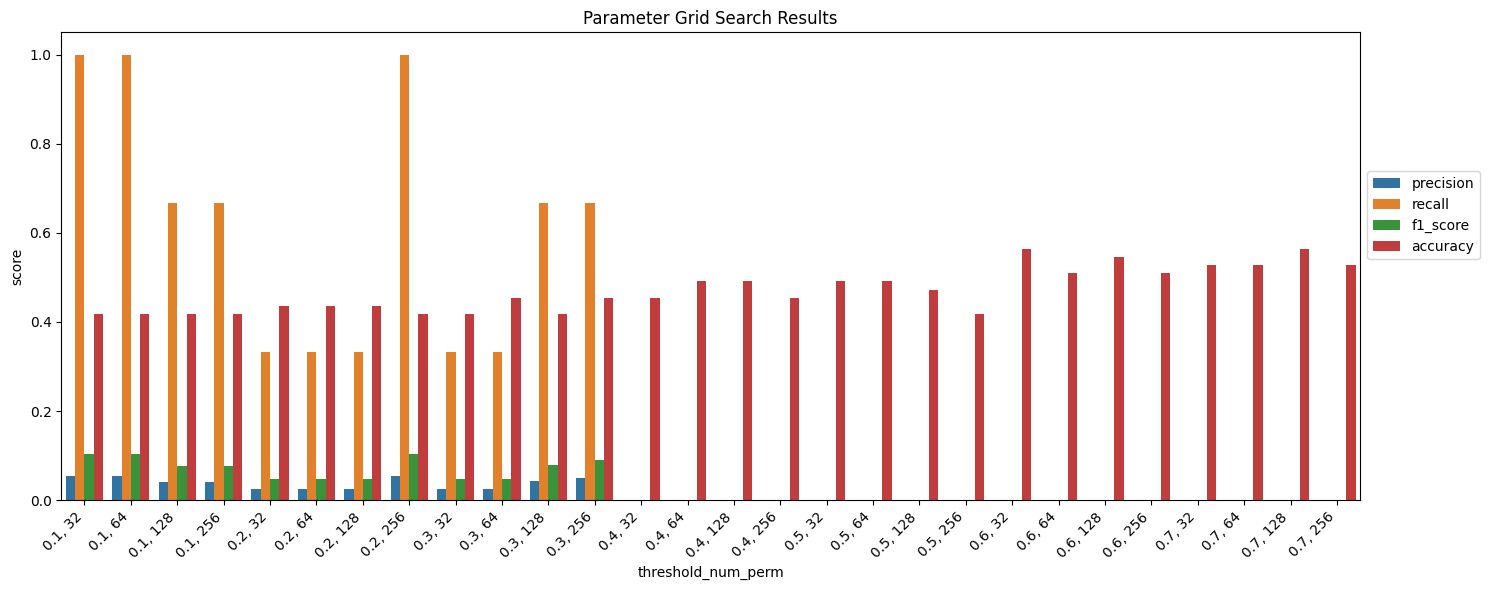

In [ ]:

# Melt the DataFrame to combine 'threshold' and 'num_perm' into a single column
melted_df = pd.melt(results_df, id_vars=['threshold', 'num_perm'],
                    value_vars=['precision', 'recall', 'f1_score', 'accuracy'],
                    var_name='metric', value_name='score')

# Create a new column combining 'threshold' and 'num_perm'
melted_df['threshold_num_perm'] = melted_df['threshold'].astype(str) + ', ' + melted_df['num_perm'].astype(str)

# Create the grouped bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='threshold_num_perm', y='score', hue='metric',
            data=melted_df, errorbar=None)
plt.title('Parameter Grid Search Results')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##4.6 Jaccard Similarity vs LSH Probabillity visualization

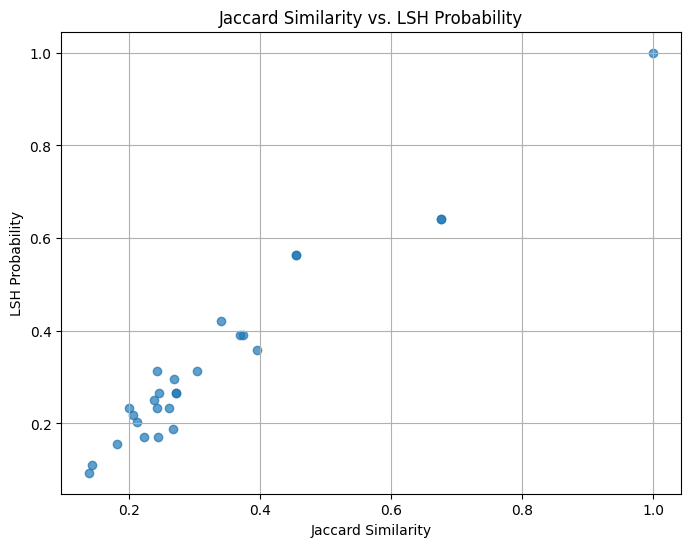

In [ ]:
#initialize minhashses
num_perm = 64
minhashes = {}
for user, songs in user_songs_dict.items():
    m = MinHash(num_perm=num_perm)
    for song in songs:
        m.update(str(song).encode('utf8'))
    minhashes[user] = m

# Initialize LSH
threshold = 0.2
lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
for user, mh in minhashes.items():
    lsh.insert(user, mh)

#get candidate pairs by quering the keys for similar users
candidate_pairs = []
for user in user_songs_dict.keys():
    for other_user in lsh.query(minhashes[user]):
        if user != other_user and (other_user, user) not in candidate_pairs:  # Avoid duplicates
            candidate_pairs.append((user, other_user))

#calculate jaccard similarity and lsh probs f every pair
jaccard_similarities = []
lsh_probabilities = []

for user1, user2 in candidate_pairs:
    set1 = user_songs_dict[user1]
    set2 = user_songs_dict[user2]

    # Jaccard similarity
    jaccard = calculate_jaccard_similarity(set1, set2)
    jaccard_similarities.append(jaccard)

    # LSH probability (approximated as MinHash similarity)
    mh1 = minhashes[user1]
    mh2 = minhashes[user2]
    lsh_prob = mh1.jaccard(mh2)
    lsh_probabilities.append(lsh_prob)

# Plot Jaccard similarity vs. LSH probability
plt.figure(figsize=(8, 6))
plt.scatter(jaccard_similarities, lsh_probabilities, alpha=0.7)

plt.xlabel("Jaccard Similarity")
plt.ylabel("LSH Probability")
plt.title("Jaccard Similarity vs. LSH Probability")

plt.grid(True)
plt.show()

#5.Define Strategies for recommendations

##1 rst Approach: Items not been seen by any memebr of the group

1. Identify items not listened to by any group member.

2. Use the SVD predictions to rank these items.

3. Select the top-N items based on the predicted ratings.

In [ ]:
def get_unseen_items(group, user_item_matrix):
  group_items=user_item_matrix.loc[group].sum(axis=0) #selecting rows that corresponding to group members
                                                      #and sum along the columns(vertically , down the rows)
  unseen_items=group_items[group_items==0].index.tolist()
  return unseen_items

In [ ]:
def recommend_unseen_items(group, user_item_matrix, svd_model, top_n=10):

  unseen_items=get_unseen_items(group, user_item_matrix)
  #print(unseen_items )
  predictions=[]
  for item in unseen_items:

    #predict the rating for each user of the group
    predicted_ratings=[svd_model.predict(user, item).est for user in group]

    #take the average predictions
    average_rating=sum(predicted_ratings)/len(predicted_ratings)

    predictions.append((item,average_rating))

  #sort predictions by average predicted rating
  predictions.sort(key=lambda x: x[1], reverse=True)

  #return the top n items
  top_items=[item for item, average_rating in predictions[:top_n]]
  return top_items

In [ ]:
# def recommend_unseen_items_als(group, user_item_matrix, als_model, top_n=10):
#     user_index = [user_item_matrix.index.get_loc(user) for user in group if user in user_item_matrix.index]
#     #print(user_index)
#     unseen_items = get_unseen_items(group, user_item_matrix)
#     #print(unseen_items)
#     predictions = []

#     for item in unseen_items:
#         item_index = user_item_matrix.columns.get_loc(item)
#         #print(item_index)
#         predicted_ratings = [als_model.user_factors[u] @ als_model.item_factors[item_index] for u in user_index]
#         #print(predicted_ratings)
#         average_rating = np.mean(predicted_ratings)
#         predictions.append((item, average_rating))

#     predictions.sort(key=lambda x: x[1], reverse=True) #sort in descending order
#     #print(predictions)
#     return [item for item, _ in predictions[:top_n]]


In [ ]:
# top_items_als=recommend_unseen_items_als(similarity_groups[0], user_item_matrix, best_als)
# print(top_items_als)

In [ ]:
#for all groups
group_suggestions_not_seen=[]
for group in random_groups:
  top_items=recommend_unseen_items(group, user_item_matrix, best_svd)
  group_suggestions_not_seen.append(top_items)

In [ ]:
#print group_suggestions_not_seen
for i, group in enumerate(random_groups):
  print(f"Group {i}: {group_suggestions_not_seen[i]}")

Group 0: [1808, 336, 2810, 3219, 2805, 2786, 2774, 2814, 3111, 3229]
Group 1: [2810, 2805, 1808, 144, 2814, 2760, 1118, 665, 95, 1063]
Group 2: [2566, 308, 2548, 142, 370, 542, 2104, 404, 338, 2647]
Group 3: [2533, 2578, 2947, 2779, 3089, 2665, 2790, 2653, 2539, 3224]
Group 4: [1516, 2612, 2779, 2109, 3089, 2665, 2261, 2308, 3003, 2707]
Group 5: [503, 2059, 911, 984, 2612, 2122, 1403, 2256, 144, 1918]
Group 6: [1516, 2779, 2109, 3089, 2665, 1878, 2270, 2261, 2308, 3003]
Group 7: [1403, 2485, 1923, 845, 2665, 3219, 5, 175, 584, 1641]
Group 8: [2533, 2653, 2539, 3224, 2947, 3206, 18, 2578, 2776, 2726]
Group 9: [2707, 2810, 2779, 2805, 3089, 1808, 2261, 2308, 3003, 3092]
Group 10: [2489, 1403, 2485, 2036, 204, 887, 2562, 1528, 2665, 2645]


##2nd approach:Items seen by at least one or two users in the group

In [ ]:
def get_seen_items(group, user_item_matrix, min_seen=int):
  group_items=user_item_matrix.loc[group].sum(axis=0) #selecting rows that corresponding to group members
                                                      #and sum along the columns(vertically , down the rows)
  seen_items=group_items[group_items>=min_seen].index.tolist() #keep items that have seen at least by min_seen
  return seen_items

In [ ]:
def recommend_seen_items(group, user_item_matrix, svd_model, top_n=10):

  items_1=get_seen_items(group, user_item_matrix, min_seen=1)
  #print(items_1)
  items_2=get_seen_items(group, user_item_matrix, min_seen=2)

  #print(f"Items seen by at least one user: {len(items_1)}")
  #print(f"Items seen by at least two users: {len(items_2)}")

  #calculate predicted ratings and then mean in order to get more group-oriented recommendations
  all_predictions = [svd_model.predict(user, item).est
                    for user in group for item in user_item_matrix.columns]
  group_baseline = np.mean(all_predictions)

  predictions_1=[]
  predictions_2=[]
  predictions_3=[]
  predictions_3b=[]
  predictions_4=[]
  predictions_4b=[]

  for item in items_1:
    predicted_ratings_1=[]
    for user in group:
      #predict the rating for each user of the group
      if user_item_matrix.loc[user,item]> 0:
        ratings=user_item_matrix_random.loc[user,item]
      else:
        ratings=svd_model.predict(user, item).est + group_baseline
      predicted_ratings_1.append(ratings)
    weighted_average_rating_1=sum(predicted_ratings_1)/len(predicted_ratings_1)
    predictions_1.append((item, weighted_average_rating_1))

  #sort predictions by average predicted rating
  predictions_1.sort(key=lambda x: x[1], reverse=True)

  #return the top n items
  top_items_1=[item for item,_ in predictions_1[:top_n]]

  for item in items_2:
    predicted_ratings_2 = []
    for user in group:
        if user_item_matrix.loc[user, item] > 0:
            ratings = user_item_matrix_random.loc[user, item]
        else:
            ratings = svd_model.predict(user, item).est + (group_baseline * 2)
        predicted_ratings_2.append(ratings)

    weighted_average_rating_2 = sum(predicted_ratings_2) / len(predicted_ratings_2)
    predictions_2.append((item, weighted_average_rating_2))

  predictions_2.sort(key=lambda x: x[1], reverse=True)
  top_items_2 = [item for item, _ in predictions_2[:top_n]]

  for item in items_1:
    predicted_ratings_3=[]
    for user in group:
      #predict the rating for each user of the group
      if user_item_matrix.loc[user,item]> 0:
        ratings=user_item_matrix_random.loc[user,item]

      else:
        ratings=svd_model.predict(user, item).est
      predicted_ratings_3.append(ratings)
    weighted_average_rating_3=sum(predicted_ratings_3)/len(predicted_ratings_3)
    predictions_3.append((item, weighted_average_rating_3))

  #sort predictions by average predicted rating
  predictions_3.sort(key=lambda x: x[1], reverse=True)



  #return the top n items
  top_items_3=[item for item,_ in predictions_3[:top_n]]

  for item in items_2:
    predicted_ratings_3b=[]
    for user in group:
      #predict the rating for each user of the group
      if user_item_matrix.loc[user,item]> 0:
        ratings=user_item_matrix_random.loc[user,item]

      else:
        ratings=svd_model.predict(user, item).est
      predicted_ratings_3b.append(ratings)
    weighted_average_rating_3b=sum(predicted_ratings_3b)/len(predicted_ratings_3b)
    predictions_3b.append((item, weighted_average_rating_3b))

  #sort predictions by average predicted rating
  predictions_3b.sort(key=lambda x: x[1], reverse=True)



  #return the top n items
  top_items_3b=[item for item,_ in predictions_3b[:top_n]]

  for item in items_1:
    predicted_ratings_4=[] #weighted average for 1 user
    for user in group:
      #predict the rating for each user of the group
      if user_item_matrix.loc[user,item]> 0:
        ratings=user_item_matrix_random.loc[user,item]
        predicted_ratings_4.append(ratings)
        predicted_ratings_4.append(ratings)
      else:
        ratings=svd_model.predict(user, item).est
        predicted_ratings_4.append(ratings)
    weighted_average_rating_4=sum(predicted_ratings_4)/len(predicted_ratings_4)
    predictions_4.append((item, weighted_average_rating_4))

  #sort predictions by average predicted rating
  predictions_4.sort(key=lambda x: x[1], reverse=True)

  #return the top n items
  top_items_4=[item for item,_ in predictions_4[:top_n]]

  for item in items_2:
    predicted_ratings_4b=[] #weighted average for 1 user
    for user in group:
      #predict the rating for each user of the group
      if user_item_matrix.loc[user,item]> 0:
        ratings=user_item_matrix_random.loc[user,item]
        predicted_ratings_4b.append(ratings)
        predicted_ratings_4b.append(ratings)
      else:
        ratings=svd_model.predict(user, item).est
        predicted_ratings_4b.append(ratings)
    weighted_average_rating_4b=sum(predicted_ratings_4b)/len(predicted_ratings_4b)
    predictions_4b.append((item, weighted_average_rating_4b))

  #sort predictions by average predicted rating
  predictions_4b.sort(key=lambda x: x[1], reverse=True)

  #return the top n items
  top_items_4b=[item for item,_ in predictions_4b[:top_n]]




  return top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b

In [ ]:
top_items_1, top_items_2,top_items_3,top_items_3b, top_items_4, top_items_4b=recommend_seen_items(random_groups[0], user_item_matrix, best_svd)
print(top_items_1)
print(top_items_2)
print(top_items_3)
print(top_items_3b)
print(top_items_4)
print(top_items_4b)

[497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460]
[497, 1056, 125, 138, 170, 365, 428, 454, 460, 488]
[497, 1466, 817, 913, 1056, 111, 125, 138, 170, 365]
[497, 1466, 817, 913, 1056, 111, 125, 138, 170, 365]
[497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460]
[497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460]


In [ ]:
#for all groups
group_suggestions_seen_1=[]
group_suggestions_seen_2=[]
group_suggestions_seen_3=[]
group_suggestions_seen_3b=[]
group_suggestions_seen_4=[]
group_suggestions_seen_4b=[]
#group_suggestions_seen=[]
for group in random_groups:
  top_items_1, top_items_2, top_items_3,top_items_3b, top_items_4, top_items_4b=recommend_seen_items(group, user_item_matrix, best_svd)
  group_suggestions_seen_1.append(top_items_1)
  group_suggestions_seen_2.append(top_items_2)
  group_suggestions_seen_3.append(top_items_3)
  group_suggestions_seen_3b.append(top_items_3b)
  group_suggestions_seen_4.append(top_items_4)
  group_suggestions_seen_4b.append(top_items_4b)
  #group_suggestions_seen.append(top_items_1+top_items_2)

In [ ]:
#print
for i, group in enumerate(random_groups):
  print(f"Group {i}:")
  print(f"  - Strategy 1 (seen by at least one): {group_suggestions_seen_1[i]}")
  print(f"  - Strategy 2 (seen by at least two): {group_suggestions_seen_2[i]}")
  print(f"  - Strategy 3 (seen by at least one,average): {group_suggestions_seen_3[i]}")
  print(f"  - Strategy 3b (seen by at least two,average): {group_suggestions_seen_3b[i]}")
  print(f"  - Strategy 4 (seen by at least one, weighted average): {group_suggestions_seen_4[i]}")
  print(f"  - Strategy 4b (seen by at least two, weighted average): {group_suggestions_seen_4b[i]}")
  print("-" * 50)  # Separator for readability

Group 0:
  - Strategy 1 (seen by at least one): [497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460]
  - Strategy 2 (seen by at least two): [497, 1056, 125, 138, 170, 365, 428, 454, 460, 488]
  - Strategy 3 (seen by at least one,average): [497, 1466, 817, 913, 1056, 111, 125, 138, 170, 365]
  - Strategy 3b (seen by at least two,average): [497, 1466, 817, 913, 1056, 111, 125, 138, 170, 365]
  - Strategy 4 (seen by at least one, weighted average): [497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460]
  - Strategy 4b (seen by at least two, weighted average): [497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460]
--------------------------------------------------
Group 1:
  - Strategy 1 (seen by at least one): [817, 890, 913, 1923, 892, 2611, 497, 510, 613, 893]
  - Strategy 2 (seen by at least two): [817, 890, 913, 1923, 892, 2611, 497, 510, 613, 893]
  - Strategy 3 (seen by at least one,average): [817, 890, 913, 1923, 892, 2611, 497, 510, 613, 893]
  - Strategy 3b (seen by at least two,aver

In [ ]:
def check_svd_predictions(group, user_item_matrix, svd_model):
    """
    Check if SVD model returns the same predictions for min_seen=1 and min_seen=2.
    """
    items_1 = get_seen_items(group, user_item_matrix, min_seen=1)
    print(f"Items_1{items_1}")
    items_2 = get_seen_items(group, user_item_matrix, min_seen=2)
    print(f"Items_2:{items_2}")

    # Take a small sample for checking
    sample_items = list(set(items_1[:6] + items_2[:6]))  # Take first 5 from each (unique items)

    print("Sample items being tested:", sample_items)

    # Store predictions
    predictions = {}

    for item in sample_items:
        pred_ratings_1 = [svd_model.predict(user,item).est for user in group]
        pred_ratings_2 = [svd_model.predict(user,item).est for user in group]

        avg_pred_1 = sum(pred_ratings_1) / len(pred_ratings_1)
        avg_pred_2 = sum(pred_ratings_2) / len(pred_ratings_2)

        predictions[item] = (avg_pred_1, avg_pred_2)

    #print
    print("\n **SVD Model Predictions Comparison**")
    for item, (pred1, pred2) in predictions.items():
        print(f"Item {item}: min_seen=1 -> {pred1:.4f}, min_seen=2 -> {pred2:.4f}")

    #check if the predictions from svd are identical
    identical_predictions = all(abs(pred1 - pred2) < 1e-5 for pred1, pred2 in predictions.values())

    if identical_predictions:
        print("\n SVD model is returning identical predictions for min_seen=1 and min_seen=2!")
    else:
        print("\n SVD model is returning different predictions for min_seen=1 and min_seen=2.")
check_svd_predictions(random_groups[0], user_item_matrix, best_svd)


Items_1[0, 2, 4, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 28, 32, 36, 37, 46, 47, 50, 51, 56, 57, 58, 65, 66, 68, 70, 73, 76, 77, 78, 81, 82, 86, 93, 95, 99, 100, 101, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117, 123, 125, 126, 128, 131, 132, 134, 135, 137, 138, 140, 142, 143, 144, 147, 149, 151, 152, 154, 159, 162, 164, 170, 171, 178, 179, 185, 187, 191, 193, 195, 197, 198, 199, 200, 203, 204, 210, 211, 212, 216, 217, 219, 222, 225, 232, 239, 245, 248, 249, 253, 255, 259, 260, 265, 267, 275, 280, 282, 283, 289, 293, 304, 305, 308, 311, 313, 314, 315, 316, 317, 321, 322, 323, 325, 327, 330, 340, 342, 346, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421

#6.Make model and train

##6.1 Compute user_weights based on the songs that have heard

In [ ]:
#user_weights_count = df.groupby('username')['track_id'].count()
#user_weights_mean = df.groupby('username')['rating'].mean()
#user_weights_diversity = df.groupby('username')['track_genre'].nunique()

#user_weights = (
 #   0.4 * (user_weights_count / user_weights_count.max()) +
 #   0.4 * (user_weights_mean / user_weights_mean.max()) +
 #   0.2 * (user_weights_diversity / user_weights_diversity.max())
#)


In [ ]:
# user_weights=combined_df.groupby('username')['track_id'].count()

# #scale them to (0,1)
# user_weights=user_weights/user_weights.max()
# user_weights


##6.2 Train an SVD model for every user


In [ ]:
# reader=Reader(rating_scale=(1, 5))
# #for every group
# group_suggestions=[]#list for the suggestions of the group
# for group in groups:
#   group_recommendations={} #dictionary to store predictions for every user with weights
#                            #in the group

#   #for each user train and fit and svd algorithm
#   for user in group:

#     #filter train data for every user
#     user_data=combined_df[combined_df['username']==user]


#     #Create a DataFrame for Surprise package in the form [username, track_id, rating]
#     user_surprise_data=user_data[['username', 'track_id', 'rating']]

#     #fit
#     data=Dataset.load_from_df(user_surprise_data, reader)
#     trainset = data.build_full_trainset()
#     svd = SVD()
#     svd.fit(trainset)

#     #predict
#     predictions_train=svd.test(trainset.build_testset())
#     #print(f"Group:", group)
#     #print(predictions_train)

#     #evaluate the prediction
#     #accuracy.mse(predictions_train)

#     #unseen tracks of the user
#     unseen_tracks =combined_df[~combined_df['track_id'].isin(user_data['track_id'])]['track_id'].unique()
#     #print(unseen_tracks)

#     for track in unseen_tracks:
#       #predict if match
#       prediction = svd.predict(user, track)
#       if track not in group_recommendations:
#         group_recommendations[track]=[] #if the song does not included in the list, make a list for that
#       group_recommendations[track].append((prediction.est,user_weights[user])) #append in the list the estimation and its weights


#   #[(2.3476610548908505, 0.02952565343659245),
#   #(2.7481380706904295, 0.5024201355275896),
#   #(2.393017557153354, 0.036786060019361085)])
#   #compute the weighted average for unseen items
#   final_recommendations={}
#   for track,predictions in group_recommendations.items():
#     print(f"Group Recommendations for Track {track}: {predictions}")

#     total_weight=0
#     weighted_sum=0
#     for prediction,weight in predictions:
#       #print(f"Prediction: {prediction}, Weight: {weight}")
#       weighted_sum+=prediction*weight
#       #print(f"Track: {track}, Weighted Sum: {weighted_sum}")

#       total_weight+=weight
#     final_recommendations[track]=weighted_sum/total_weight
#     #print(f"Weighted Sum: {weighted_sum}, Total Weight: {total_weight}, Weighted Mean: {final_recommendations[track]}")
#   #append in group_recommendations
#   group_suggestions.append(sorted(final_recommendations.items(), key=lambda x: x[1], reverse=True)[:10])

###6.2.1 Train an svd model for every group

In [ ]:
# #train an svd for every group
# #training data foer every group

# reader=Reader(rating_scale=(1, 5))
# group_recommendations_new=[]

# for group in groups:
#   group_data=df[df['username'].isin(group)]


#   data=Dataset.load_from_df(group_data[['username', 'track_id', 'rating']], reader)
#   trainset = data.build_full_trainset()

#   #train an svd
#   svd = SVD()
#   svd.fit(trainset)

#   #prediction for training set
#   predictions_train=svd.test(trainset.build_testset())

#   track_predictions=defaultdict(list)

#   #for every user in the group
#   for user in group:

#     #user_data
#     user_data=group_data[group_data['username']==user]
#     #unseen tracks of the user
#     unseen_tracks =df[~df['track_id'].isin(group_data[group_data['username']==user]['track_id'])]['track_id'].unique()

#     for track in unseen_tracks:
#       #predict if match
#       prediction = svd.predict(user, track)
#       if track not in track_predictions:
#         track_predictions[track]=[] #if the song does not included in the list, make a list for that
#       track_predictions[track].append((prediction.est,user_weights[user])) #append in the list the estimation

#   #compute the weighted average for unseen items
#   final_recommendations={}
#   for track,predictions in track_predictions.items():
#     total_weight=0
#     weighted_sum=0
#     for prediction,weight in predictions:
#       weighted_sum+=prediction*weight
#       total_weight+=weight
#     final_recommendations[track]=weighted_sum/total_weight

#   #append in group_recommendations
#   group_recommendations_new.append(sorted(final_recommendations.items(), key=lambda x: x[1], reverse=True)[:10])




In [ ]:
# #print the top-10 suggestions for evefry group
# for i, recommendations in enumerate(group_recommendations_new):
#   print(f"Group {i},{recommendations}")

#7.Evaluation on the recoomendations

##7.1 Evaluation /Coverage

Υπολογίζουμε το coverage για καθε λίστα τραγουδιών ξεχωριστά(groyp_suggestions_not seen ->τα ταργουδια που κανένα μέλος της ομάδας δεν έχει ακούσει και έχουν προταθεί, group_suggestions_1 ->τα τραγούδια που έχουν ακούσει τουλάχιστον ένα μέλος του group και έχουν προταθεί, group_suggestions_2-> τα ταργούδια που εχουν ακούσει τουλάχιστον 2 μέλη της ομάδας και έχουν προταθεί)  

In [ ]:
# def coverage(group_suggestions_not_seen,group_suggestions_1,group_suggestions_2,group_suggestions_3,group_suggestions_3b,group_suggestions_4,group_suggestions_4b, groups, user_item_matrix, svd_model, threshold=3):
#     coverage_scores = []

#     for i, (top_items,top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b) in enumerate(zip(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2,group_suggestions_3,group_suggestions_3b,group_suggestions_4,group_suggestions_4b)):
#         group = groups[i]

#         #print(i, top_items_1, top_items_2)
#         for recommendations, strategy_name in [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen by two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by+_two_average"),(top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:
#           #print(f"Group {i}: {strategy_name}")
#           #print(recommendations)

#           #Group 0: Seen_by_one
#           #[325.0, 413.0, 429.0, 436.0, 469.0, 478.0, 496.0, 503.0, 575.0, 599.0]
#           #Group 0: Seen by two
#           #[938.0, 2266.0, 844.0, 325.0, 984.0, 959.0, 2494.0, 862.0, 413.0, 429.0]

#           coverage_scores_liked_by_all=0
#           coverage_scores_liked_by_most=0
#           total_recommendations=len(recommendations)

#           if total_recommendations == 0:
#             print(f"total_recommendations:{total_recommendations}")
#             coverage_scores.append((strategy_name, 0,0))
#             continue

#           for track in recommendations:
#             likes= 0
#             for user in group:
#               if user_item_matrix.loc[user,track]>0:
#                 rating=user_item_matrix_random.loc[user, track]
#                 #print("already rated")

#               else:
#                 rating=int(svd_model.predict(user, track).est)
#                 #print("prediction from svd")

#              # print(f"rating for track :{track},{rating}")
#               if rating>=threshold:
#                 likes+=1

#             if likes==len(group):
#               coverage_scores_liked_by_all+=1


#             if likes>=math.ceil((len(group)/2)):
#               coverage_scores_liked_by_most+=1


#           #print(f"Group {i}: {strategy_name}")
#           #print(f"coverage_scores_liked_by_all: {coverage_scores_liked_by_all}")
#           #print(f"coverage_scores_liked_by_most: {coverage_scores_liked_by_most}")
#           coverage_scores.append((i, strategy_name,
#                                 coverage_scores_liked_by_all/total_recommendations,
#                                 coverage_scores_liked_by_most/total_recommendations
#           ))

#     return coverage_scores

In [ ]:
# coverage_results = coverage(group_suggestions_not_seen,group_suggestions_seen_1, group_suggestions_seen_2,group_suggestions_seen_3,group_suggestions_seen_3b,group_suggestions_seen_4,group_suggestions_seen_4b, similarity_groups, user_item_matrix, best_svd)

# for i, strategy, liked_all, liked_most in coverage_results:
#     print(f"Group:{i}")
#     print(f"Strategy: {strategy}")
#     print(f"  Liked by all: {liked_all:.2f}")
#     print(f"  Liked by most: {liked_most:.2f}")



In [ ]:
group_suggestions_1

NameError: name 'group_suggestions_1' is not defined

In [ ]:
def coverage_fun(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2, group_suggestions_3, group_suggestions_3b, group_suggestions_4, group_suggestions_4b, groups, user_item_matrix, svd_model, hide_ratio=0.2,threshold=1):

  coverage_scores=[]
  for i, (top_items,top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b) in enumerate(zip(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2,group_suggestions_3,group_suggestions_3b,group_suggestions_4,group_suggestions_4b)):
    group = groups[i]

    #print(i, top_items_1, top_items_2)
    for recommendations, strategy_name in [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by_two_average"),(top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:
      #hide a random group of items
      num_to_hide=int(len(recommendations)*hide_ratio)
      hidden_items=random.sample(group_suggestions_not_seen[1], num_to_hide)

      #remove hidden items from the user_item_matrix
      user_item_matrix_hidden=user_item_matrix.copy()
      for user in group:
        for item in hidden_items:
          if item in user_item_matrix_hidden.columns:
            user_item_matrix_hidden.loc[user,item]=0

      #re-run the svd algorithm to see how many of the hidden items are predicted
      still_predicted=0
      for item in hidden_items:
        predicted_ratings=[
            svd_model.predict(user, item).est for user in group
        ]
        avg_prediction=np.mean(predicted_ratings)
        print(avg_prediction)

        if avg_prediction>=threshold:
          still_predicted +=1

      #print(still_predicted)
      #compute coverage still_predicted/total hiden items
      coverage=still_predicted/num_to_hide

      coverage_scores.append((i, strategy_name,coverage))

  return coverage_scores

In [ ]:
coverage_results=coverage_fun(group_suggestions_not_seen, group_suggestions_seen_1, group_suggestions_seen_2,group_suggestions_seen_3, group_suggestions_seen_3b, group_suggestions_seen_4, group_suggestions_seen_4b, random_groups, user_item_matrix, best_svd)
for i, strategy, coverage in coverage_results:
  print(f"Group:{i}")
  print(f"Strategy: {strategy}")
  print(f"Coverage: {coverage:.2f}")


2.282227925250488
1.4226574501689093
1.4862336796958049
1.7874279579444305
2.282227925250488
1.4862336796958049
2.282227925250488
1.6867181431651446
1.6867181431651446
2.282227925250488
2.5159613329491344
1.989703169576136
1.989703169576136
2.475655117546499
1.4226574501689093
1.3817711157895423
1.4514547917299616
1.4076700779506324
1.4049232517651555
1.4862336796958049
1.4514547917299616
1.3652987724492283
1.3817711157895423
1.4287848893326238
1.3817711157895423
1.4226574501689093
1.4862336796958049
1.6530411576491233
1.0
1.8281024260335228
1.8468984856062927
1.0
2.694871606940414
1.6147152257683273
2.694871606940414
2.540565369348846
1.0
2.694871606940414
1.7110271934041983
1.8468984856062927
1.4177133233232437
2.4415869899589207
1.076921786659835
2.1535843049091663
2.17991014036632
1.6633294733063142
1.0
2.156811536084316
2.1535843049091663
1.0
1.0
2.17991014036632
1.2858772678097494
1.0
1.5807309259552866
1.076921786659835
1.7862353407382912
2.3782409410337313
1.0
1.0
1.0
2.1480595

In [ ]:
#sum up

coverage_data = coverage_results


# Convert to DataFrame
df = pd.DataFrame(coverage_data, columns=["Group", "Strategy", "Coverage Score"])
#print(df)

# Compute overall mean+std diversity per strategy

mean_coverage = df.groupby("Strategy")["Coverage Score"].mean().reset_index()

std_coverage=df.groupby("Strategy")["Coverage Score"].std().reset_index()


#print
print(mean_coverage ,"\n")
print(std_coverage)


               Strategy  Coverage Score
0          Seen by none             1.0
1           Seen_by_one             1.0
2   Seen_by_one_average             1.0
3  Seen_by_one_weighted             1.0
4           Seen_by_two             1.0
5   Seen_by_two_average             1.0
6  Seen_by_two_weighted             1.0 

               Strategy  Coverage Score
0          Seen by none             0.0
1           Seen_by_one             0.0
2   Seen_by_one_average             0.0
3  Seen_by_one_weighted             0.0
4           Seen_by_two             0.0
5   Seen_by_two_average             0.0
6  Seen_by_two_weighted             0.0


##7.2 Evaluation/Diversity

In [ ]:
def diversity(group_suggestions_not_seen, group_suggestions_1,group_suggestions_2, group_suggestions_3, group_suggestions_3b, group_suggestions_4, group_suggestions_4b, df):
    diversity_scores = []
    for i, (top_items,top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b) in enumerate(zip(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2,group_suggestions_3,group_suggestions_3b,group_suggestions_4,group_suggestions_4b)):

      for recommendations, strategy_name in  [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by_two_average"),(top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:
            track_ids = [track_id for track_id in recommendations]

            # Handle case where no recommendations exist
            if not track_ids:
                diversity_scores.append((strategy_name, 0))
                continue

            song_features_df=combined_df.loc[combined_df['track_id'].isin(track_ids), ['track_id', 'artists', 'album_name']].drop_duplicates()
            #print(song_features_df)
            album_diversity_score = 0
            artist_diveristy_score=0
            total_pairs= len(track_ids)*(len(track_ids)-1)/2 #(n*(n-1)/2)

            for k in range(len(track_ids) - 1):
              for l in range(k + 1, len(track_ids)):

                #compare pairwise genres
                song1 = song_features_df[song_features_df['track_id'] == track_ids[k]]
                song2 = song_features_df[song_features_df['track_id'] == track_ids[l]]

                if not song1.empty and not song2.empty:
                        album1, artist1 = song1['album_name'].values[0], song1['artists'].values[0]
                        album2, artist2 = song2['album_name'].values[0], song2['artists'].values[0]
                       #print(f"album1: {album1}, artist1: {artist1}")

                        if album1 != album2:
                            album_diversity_score += 1
                        if artist1 != artist2:
                            artist_diveristy_score += 1

            #normalize scores
            album_diversity_score/=total_pairs
            artist_diveristy_score/=total_pairs

            diversity_scores.append((i,strategy_name, album_diversity_score, artist_diveristy_score))

    return diversity_scores





In [ ]:
diversity_results = diversity(group_suggestions_not_seen, group_suggestions_seen_1, group_suggestions_seen_2,group_suggestions_seen_3,group_suggestions_seen_3b,group_suggestions_seen_4,group_suggestions_seen_4b,combined_df )

for (i, strategy, diversity_album, diversity_artist) in (diversity_results):
    print(f"Group={i}")
    print(f"Strategy: {strategy}")
    print(f"Album_diversity: {diversity_album:.2f}")
    print(f"Artist_diversity: {diversity_artist:.2f}")



Group=0
Strategy: Seen by none
Album_diversity: 0.98
Artist_diversity: 0.98
Group=0
Strategy: Seen_by_one
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_two
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_one_average
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_two_average
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_one_weighted
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_two_weighted
Album_diversity: 1.00
Artist_diversity: 1.00
Group=1
Strategy: Seen by none
Album_diversity: 0.98
Artist_diversity: 0.98
Group=1
Strategy: Seen_by_one
Album_diversity: 0.98
Artist_diversity: 0.98
Group=1
Strategy: Seen_by_two
Album_diversity: 0.98
Artist_diversity: 0.98
Group=1
Strategy: Seen_by_one_average
Album_diversity: 0.98
Artist_diversity: 0.98
Group=1
Strategy: Seen_by_two_average
Album_diversity: 0.98
Artist_diversity: 0.98
Group=1
Strategy: Seen_by_one_weighted
Album_div

In [ ]:

data = diversity_results


# Convert to DataFrame
df = pd.DataFrame(data, columns=["Group", "Strategy", "Album_diversity", "Artist_diversity"])
#print(df)

# Compute mean diversity per strategy (average of Album & Artist diversity)
df["Diversity"] = df[["Album_diversity", "Artist_diversity"]].mean(axis=1)
#print(df)

# Compute overall mean+std diversity per strategy

mean_diversity = df.groupby("Strategy")["Diversity"].mean().reset_index()

std_diversity=df.groupby("Strategy")["Diversity"].std().reset_index()

#rename columns
mean_diversity.rename(columns={"Diversity": "Mean_Diversity"}, inplace=True)
std_diversity.rename(columns={"Diversity": "Std_Diversity"}, inplace=True)

#print
print(mean_diversity ,"\n")
print(std_diversity)


               Strategy  Mean_Diversity
0          Seen by none        0.995960
1           Seen_by_one        0.994949
2   Seen_by_one_average        0.994949
3  Seen_by_one_weighted        0.995960
4           Seen_by_two        0.993939
5   Seen_by_two_average        0.994949
6  Seen_by_two_weighted        0.995960 

               Strategy  Std_Diversity
0          Seen by none       0.008989
1           Seen_by_one       0.007639
2   Seen_by_one_average       0.009113
3  Seen_by_one_weighted       0.007491
4           Seen_by_two       0.007639
5   Seen_by_two_average       0.009113
6  Seen_by_two_weighted       0.007491


##7.3 Evaluation/Consensus

Αξιολογεί σε ποιο βαθμό τα μέλη της ομάδας έχουν καταλήξει σε συμφωνία σε σχέση με τις προτεινόμενες προτάσεις.

In [ ]:
def consensus(group_suggestions_not_seen, group_suggestions_1,group_suggestions_2, group_suggestions_3, group_suggestions_3b, group_suggestions_4, group_suggestions_4b,groups, user_item_matrx, svd_model, max_rating=4): #max_rating is fixed is the absolute difference between 5-1

    consensus_scores =[]
    for i, (top_items,top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b) in enumerate(zip(group_suggestions_not_seen, group_suggestions_1, group_suggestions_2, group_suggestions_3, group_suggestions_3b, group_suggestions_4, group_suggestions_4b)):
      group=groups[i]

      for recommendations, strategy_name in  [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by_two_average"),(top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:
        track_consensus_scores={}
        for track in recommendations:
          predicted_ratings=[]
          for user in group:
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]
              #print("already rated")
            else:
              rating=int(svd_model.predict(user,track).est)
            predicted_ratings.append(rating)

          #calculate the pairwise absolute differences in predicted ratings
          pairwise_diffs=[]
          if len(predicted_ratings)<2:
            continue
          for k in range(len(predicted_ratings)-1):
            for l in range(k+1,len(predicted_ratings)):
              diff=abs(predicted_ratings[k]-predicted_ratings[l])
              pairwise_diffs.append(diff)

          #print(pairwise_diffs)
          if pairwise_diffs:
            #average pairwise differenses
            sum_pairwise_diffs=sum(pairwise_diffs)
          avg_pairwise_diff = sum_pairwise_diffs / (len(group) *( (len(group) - 1) / 2) * max_rating)
          consensus_score=1-avg_pairwise_diff
          #print(consensus_score)
          track_consensus_scores[track]=consensus_score

        consensus_scores.append((i,strategy_name,track_consensus_scores))
       # print(consensus_scores)

    return consensus_scores


In [ ]:
consensus_results = consensus(group_suggestions_not_seen,group_suggestions_seen_1, group_suggestions_seen_2,group_suggestions_seen_3, group_suggestions_seen_3b, group_suggestions_seen_4, group_suggestions_seen_4b, random_groups, user_item_matrix, best_svd)

for i, strategy, scores in consensus_results:
    print(f"Group:{i}, Strategy:{strategy} Consensus Scores:")
    for track, score in scores.items():
        print(f"Track {track}: {score:.2f}")


Group:0, Strategy:Seen by none Consensus Scores:
Track 1808: 0.83
Track 336: 0.83
Track 2810: 0.83
Track 3219: 1.00
Track 2805: 0.83
Track 2786: 1.00
Track 2774: 1.00
Track 2814: 0.83
Track 3111: 1.00
Track 3229: 1.00
Group:0, Strategy:Seen_by_one Consensus Scores:
Track 497: 1.00
Track 1466: 0.83
Track 1056: 0.33
Track 125: 0.33
Track 138: 0.33
Track 170: 0.33
Track 365: 0.33
Track 428: 0.33
Track 454: 0.33
Track 460: 0.33
Group:0, Strategy:Seen_by_two Consensus Scores:
Track 497: 1.00
Track 1056: 0.33
Track 125: 0.33
Track 138: 0.33
Track 170: 0.33
Track 365: 0.33
Track 428: 0.33
Track 454: 0.33
Track 460: 0.33
Track 488: 0.33
Group:0, Strategy:Seen_by_one_average Consensus Scores:
Track 497: 1.00
Track 1466: 0.83
Track 817: 0.50
Track 913: 0.50
Track 1056: 0.33
Track 111: 0.50
Track 125: 0.33
Track 138: 0.33
Track 170: 0.33
Track 365: 0.33
Group:0, Strategy:Seen_by_two_average Consensus Scores:
Track 497: 1.00
Track 1466: 0.83
Track 817: 0.50
Track 913: 0.50
Track 1056: 0.33
Track 1

In [ ]:
#mean and std for consensus


#flatten the consensus scores
track_data=[]
for group,strategy,scores in consensus_results:
  for track,score in scores.items():
    track_data.append((group,strategy,track,score))

#print(track_data)

df=pd.DataFrame(track_data, columns=["Group","Strategy","Track","Consensus_Score"])
#print(df)

#for every group

result = df.groupby(["Group", "Strategy"])["Consensus_Score"].agg(["mean", "std"]).reset_index()

# Rename columns for clarity
result.rename(columns={"mean": "Mean_Consensus_Score", "std": "Std_Consensus_Score"}, inplace=True)

#sum up by strategy
result=result.groupby("Strategy")[["Mean_Consensus_Score","Std_Consensus_Score"]].mean().reset_index()

# Display the result
print(result)






               Strategy  Mean_Consensus_Score  Std_Consensus_Score
0          Seen by none              0.863636             0.031276
1           Seen_by_one              0.556061             0.191134
2   Seen_by_one_average              0.587879             0.187489
3  Seen_by_one_weighted              0.553030             0.193430
4           Seen_by_two              0.493939             0.200394
5   Seen_by_two_average              0.587879             0.187489
6  Seen_by_two_weighted              0.553030             0.193430


##7.4 Evaluation/Fairness

In [ ]:
def fairness(group_suggestions_not_seen, group_suggestions_1,group_suggestions_2, group_suggestions_3, group_suggestions_3b, group_suggestions_4, group_suggestions_4b, groups, user_item_matrix, svd_model, threshold=1.5):

    fairness_scores = []
    for i, (top_items,top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b) in enumerate(zip(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2,group_suggestions_3,group_suggestions_3b,group_suggestions_4,group_suggestions_4b)):
      group = groups[i]
      for recommendations, strategy_name in [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by_two_average"),(top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:
        satisfied_users=0

        for user in group:
          user_ratings=[]
          for track in recommendations:
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]
              #print("already rated")
            else:
              rating=int(svd_model.predict(user,track).est)
            user_ratings.append(rating)

          #measure how many users in the group have rated the suggested song above threshold
          count_ratings=sum(1 for rating in user_ratings if rating>=threshold)

          #if the user is satisfied from one song or more
          if count_ratings>0 :
            satisfied_users+=1

        fairness_scores.append((i,strategy_name,satisfied_users/len(group)))

    return fairness_scores

In [ ]:
fairness_scores=fairness(group_suggestions_not_seen, group_suggestions_seen_1, group_suggestions_seen_2,group_suggestions_seen_3,group_suggestions_seen_3b,group_suggestions_seen_4,group_suggestions_seen_4b, random_groups, user_item_matrix, best_svd)
for  i ,strategy, fairness_score in fairness_scores:
  print(f"group:{i} Strategy:{strategy} Fairness Score = {fairness_score:.4f}")

group:0 Strategy:Seen by none Fairness Score = 0.6667
group:0 Strategy:Seen_by_one Fairness Score = 1.0000
group:0 Strategy:Seen_by_two Fairness Score = 1.0000
group:0 Strategy:Seen_by_one_average Fairness Score = 1.0000
group:0 Strategy:Seen_by_two_average Fairness Score = 1.0000
group:0 Strategy:Seen_by_one_weighted Fairness Score = 1.0000
group:0 Strategy:Seen_by_two_weighted Fairness Score = 1.0000
group:1 Strategy:Seen by none Fairness Score = 0.3333
group:1 Strategy:Seen_by_one Fairness Score = 1.0000
group:1 Strategy:Seen_by_two Fairness Score = 1.0000
group:1 Strategy:Seen_by_one_average Fairness Score = 1.0000
group:1 Strategy:Seen_by_two_average Fairness Score = 1.0000
group:1 Strategy:Seen_by_one_weighted Fairness Score = 1.0000
group:1 Strategy:Seen_by_two_weighted Fairness Score = 1.0000
group:2 Strategy:Seen by none Fairness Score = 0.6667
group:2 Strategy:Seen_by_one Fairness Score = 1.0000
group:2 Strategy:Seen_by_two Fairness Score = 1.0000
group:2 Strategy:Seen_by_one

In [ ]:
#sum up

fairness_data = fairness_scores


# Convert to DataFrame
df = pd.DataFrame(fairness_data, columns=["Group", "Strategy", "Fairness Score"])
#print(df)

# Compute overall mean+std diversity per strategy

mean_diversity = df.groupby("Strategy")["Fairness Score"].mean().reset_index()

std_diversity=df.groupby("Strategy")["Fairness Score"].std().reset_index()


#print
print(mean_diversity ,"\n")
print(std_diversity)


               Strategy  Fairness Score
0          Seen by none        0.454545
1           Seen_by_one        1.000000
2   Seen_by_one_average        1.000000
3  Seen_by_one_weighted        1.000000
4           Seen_by_two        1.000000
5   Seen_by_two_average        1.000000
6  Seen_by_two_weighted        1.000000 

               Strategy  Fairness Score
0          Seen by none        0.224733
1           Seen_by_one        0.000000
2   Seen_by_one_average        0.000000
3  Seen_by_one_weighted        0.000000
4           Seen_by_two        0.000000
5   Seen_by_two_average        0.000000
6  Seen_by_two_weighted        0.000000


###M-prop fairness

In [ ]:
def m_prop(m_items, group_suggestions_not_seen, group_suggestions_1, group_suggestions_2, group_suggestions_3, group_suggestions_3b, group_suggestions_4, group_suggestions_4b, groups, user_item_matrix, svd_model, threshold=2.0):

    m_prop_scores = []
    for i, (top_items,top_items_1, top_items_2, top_items_3, top_items_3b, top_items_4, top_items_4b) in enumerate(zip(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2,group_suggestions_3,group_suggestions_3b,group_suggestions_4,group_suggestions_4b)):
      group = groups[i]

      for recommendations, strategy_name in [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by_two_average"),(top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:
        gp =0
        g=len(group)

        for user in group:
          user_ratings=[]
          for track in recommendations:
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]
              #print("already rated")
            else:
              rating=int(svd_model.predict(user,track).est)
            user_ratings.append(rating)
          ratings_count=sum(1 for rating in user_ratings if rating>=threshold)

          if ratings_count>=m_items:
            gp+=1

        m_prop_scores.append((i,strategy_name,gp/g))

    return m_prop_scores


In [ ]:
m_prop_results = m_prop(3,group_suggestions_not_seen, group_suggestions_seen_1,group_suggestions_seen_2,group_suggestions_seen_3,group_suggestions_seen_3b, group_suggestions_seen_4,group_suggestions_seen_4b, random_groups, user_item_matrix, best_svd)

for i,strategy, score in m_prop_results:
    print(f"Group:{i} Strategy:{strategy} m-Prop Score: {score:.2f}")


Group:0 Strategy:Seen by none m-Prop Score: 0.33
Group:0 Strategy:Seen_by_one m-Prop Score: 1.00
Group:0 Strategy:Seen_by_two m-Prop Score: 0.67
Group:0 Strategy:Seen_by_one_average m-Prop Score: 1.00
Group:0 Strategy:Seen_by_two_average m-Prop Score: 1.00
Group:0 Strategy:Seen_by_one_weighted m-Prop Score: 1.00
Group:0 Strategy:Seen_by_two_weighted m-Prop Score: 1.00
Group:1 Strategy:Seen by none m-Prop Score: 0.33
Group:1 Strategy:Seen_by_one m-Prop Score: 1.00
Group:1 Strategy:Seen_by_two m-Prop Score: 1.00
Group:1 Strategy:Seen_by_one_average m-Prop Score: 1.00
Group:1 Strategy:Seen_by_two_average m-Prop Score: 1.00
Group:1 Strategy:Seen_by_one_weighted m-Prop Score: 1.00
Group:1 Strategy:Seen_by_two_weighted m-Prop Score: 1.00
Group:2 Strategy:Seen by none m-Prop Score: 0.67
Group:2 Strategy:Seen_by_one m-Prop Score: 1.00
Group:2 Strategy:Seen_by_two m-Prop Score: 0.67
Group:2 Strategy:Seen_by_one_average m-Prop Score: 1.00
Group:2 Strategy:Seen_by_two_average m-Prop Score: 1.00
G

In [ ]:
#sum up

m_prop_fairness_data = m_prop_results


# Convert to DataFrame
df = pd.DataFrame(m_prop_fairness_data, columns=["Group", "Strategy", "M_prop_Fairness_Score"])
#print(df)

# Compute overall mean+std diversity per strategy

mean_m_prop_fairness = df.groupby("Strategy")["M_prop_Fairness_Score"].mean().reset_index()

std_m_prop_fairness=df.groupby("Strategy")["M_prop_Fairness_Score"].std().reset_index()


#print
print(mean_m_prop_fairness ,"\n")
print(std_m_prop_fairness)


               Strategy  M_prop_Fairness_Score
0          Seen by none               0.393939
1           Seen_by_one               0.969697
2   Seen_by_one_average               1.000000
3  Seen_by_one_weighted               0.969697
4           Seen_by_two               0.878788
5   Seen_by_two_average               1.000000
6  Seen_by_two_weighted               0.969697 

               Strategy  M_prop_Fairness_Score
0          Seen by none               0.201008
1           Seen_by_one               0.100504
2   Seen_by_one_average               0.000000
3  Seen_by_one_weighted               0.100504
4           Seen_by_two               0.168175
5   Seen_by_two_average               0.000000
6  Seen_by_two_weighted               0.100504


###M-envy fairness

In [ ]:
#calculate the top  x% suggestions per group

def top_x_percent_suggestions(group_suggestions, percentage):

    top_suggestions_per_group=[]
    for group_rec in group_suggestions:

      sorted_recs=sorted(group_rec,  reverse=True)

      #calculate the number of suggestions to keep.
      num_to_keep = int(len(sorted_recs) * (percentage / 100))

      #handle cases where num_to_keep is 0.
      num_to_keep = max(1, num_to_keep)

      top_suggestions_per_group.append(sorted_recs[:num_to_keep])

    return top_suggestions_per_group



In [ ]:
#suggestions from strategy_seen-by_one for every group
group_suggestions_seen_1

[[497, 1466, 1056, 125, 138, 170, 365, 428, 454, 460],
 [817, 890, 913, 1923, 892, 2611, 497, 510, 613, 893],
 [1008, 1053, 1574, 222, 305, 456, 475, 479, 480, 563],
 [372, 0, 516, 817, 922, 1377, 715, 1008, 20, 113],
 [891, 498, 1053, 131, 363, 433, 476, 502, 800, 838],
 [1466, 2213, 576, 613, 891, 2603, 2611, 2607, 510, 890],
 [753, 817, 890, 372, 715, 516, 1377, 0, 922, 1015],
 [217, 763, 2116, 77, 415, 433, 488, 493, 764, 799],
 [576, 1274, 1315, 2611, 497, 891, 892, 2598, 1377, 817],
 [890, 817, 37, 58, 131, 187, 365, 367, 435, 459],
 [1466, 2213, 890, 891, 1053, 613, 1274, 2607, 2597, 892]]

In [ ]:
top_group_suggestions_1=top_x_percent_suggestions(group_suggestions_seen_1, 35)

In [ ]:
top_group_suggestions_1

[[1466, 1056, 497],
 [2611, 1923, 913],
 [1574, 1053, 1008],
 [1377, 1008, 922],
 [1053, 891, 838],
 [2611, 2607, 2603],
 [1377, 1015, 922],
 [2116, 799, 764],
 [2611, 2598, 1377],
 [890, 817, 459],
 [2607, 2597, 2213]]

In [ ]:
def m_envy_fairness(group_suggestions_note_seen, group_suggestions_1, group_suggestions_2,group_suggestions_3, group_suggestions_3b,group_suggestions_4, group_suggestions_4b, groups, user_item_matrix, svd_model,
                    top_x_percent, m_items, threshold=4.0):
    m_envy_scores = []

    #get the top_recommendatiosn for every startegy
    top_group_suggestions_not_seen=top_x_percent_suggestions(group_suggestions_note_seen, top_x_percent)
    top_group_suggestions_1=top_x_percent_suggestions(group_suggestions_1, top_x_percent)
    top_group_suggestions_2=top_x_percent_suggestions(group_suggestions_2, top_x_percent)
    top_group_suggestions_3=top_x_percent_suggestions(group_suggestions_3, top_x_percent)
    top_group_suggestions_3b=top_x_percent_suggestions(group_suggestions_3b, top_x_percent)
    top_group_suggestions_4=top_x_percent_suggestions(group_suggestions_4, top_x_percent)
    top_group_suggestions_4b=top_x_percent_suggestions(group_suggestions_4b, top_x_percent)

    for i, (top_items, top_items_1, top_items_2,top_items_3,top_items_3b,top_items_4, top_items_4b) in enumerate(zip(top_group_suggestions_not_seen,top_group_suggestions_1, top_group_suggestions_2,top_group_suggestions_3,top_group_suggestions_3b,top_group_suggestions_4,top_group_suggestions_4b)):
      group = groups[i]

      for top_recommendations, strategy_name in [(top_items, "Seen_by_none"),(top_items_1, "Seen_by_one"),
                                                  (top_items_2, "Seen_by_two"),(top_items_3,"Seen_by_one_average"),(top_items_3b,"Seen_by_two_average"),
                                                   (top_items_4,"Seen_by_one_weighted"),(top_items_4b,"Seen_by_two_weighted")]:

        #print(f"Top_items_seen_by one{top_items_1}")
        #print(f"top items seen by two{top_items_2}")

        envy_count = 0
        for user in group:
          #print(user)
          user_ratings=[]

          for track in top_recommendations:
            #ipdb.set_trace()
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]

            else:
              rating=int(svd_model.predict(user,track).est)
            user_ratings.append(rating)
          #print(f"for user{user} the user_ratings are{user_ratings}")
          #count how many of the items have rated >=threshold
          ratings_count=sum(1 for rating in user_ratings if rating>=threshold)
          #print(f"ratings_count for user{user} {ratings_count}")

          if ratings_count>=m_items:
            envy_count += 1

        m_envy_count= envy_count/len(group)
        #print(m_envy_count, len(group))
        m_envy_scores.append((i,strategy_name,m_envy_count))

    return m_envy_scores



In [ ]:
m_envy_results = m_envy_fairness(group_suggestions_not_seen,group_suggestions_seen_1, group_suggestions_seen_2,group_suggestions_seen_3,group_suggestions_seen_3b,group_suggestions_seen_4,group_suggestions_seen_4b, random_groups, user_item_matrix, best_svd,
                                 top_x_percent=20, m_items=2)

In [ ]:
#print
for i,strategy, score in m_envy_results:
    print(f"Group:{i}")
    print(f"  Strategy:{strategy} m-Prop Score: {score:.2f}")

Group:0
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:0
  Strategy:Seen_by_one m-Prop Score: 0.67
Group:0
  Strategy:Seen_by_two m-Prop Score: 0.67
Group:0
  Strategy:Seen_by_one_average m-Prop Score: 0.67
Group:0
  Strategy:Seen_by_two_average m-Prop Score: 0.67
Group:0
  Strategy:Seen_by_one_weighted m-Prop Score: 0.67
Group:0
  Strategy:Seen_by_two_weighted m-Prop Score: 0.67
Group:1
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:1
  Strategy:Seen_by_one m-Prop Score: 0.67
Group:1
  Strategy:Seen_by_two m-Prop Score: 0.67
Group:1
  Strategy:Seen_by_one_average m-Prop Score: 0.67
Group:1
  Strategy:Seen_by_two_average m-Prop Score: 0.67
Group:1
  Strategy:Seen_by_one_weighted m-Prop Score: 0.67
Group:1
  Strategy:Seen_by_two_weighted m-Prop Score: 0.67
Group:2
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:2
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:2
  Strategy:Seen_by_two m-Prop Score: 0.67
Group:2
  Strategy:Seen_by_one_average m-Prop Score: 0.33
Group:2
  Strategy:Se

In [ ]:
#sum up

m_envy_fairness_data = m_envy_results


# Convert to DataFrame
df = pd.DataFrame(m_envy_fairness_data, columns=["Group", "Strategy", "M_envy_Fairness_Score"])
#print(df)

# Compute overall mean+std diversity per strategy

mean_m_envy_fairness = df.groupby("Strategy")["M_envy_Fairness_Score"].mean().reset_index()

std_m_envy_fairness=df.groupby("Strategy")["M_envy_Fairness_Score"].std().reset_index()


#print
print(mean_m_envy_fairness ,"\n")
print(std_m_envy_fairness)


               Strategy  M_envy_Fairness_Score
0          Seen_by_none               0.000000
1           Seen_by_one               0.666667
2   Seen_by_one_average               0.545455
3  Seen_by_one_weighted               0.606061
4           Seen_by_two               0.636364
5   Seen_by_two_average               0.545455
6  Seen_by_two_weighted               0.606061 

               Strategy  M_envy_Fairness_Score
0          Seen_by_none               0.000000
1           Seen_by_one               0.210819
2   Seen_by_one_average               0.224733
3  Seen_by_one_weighted               0.250252
4           Seen_by_two               0.179787
5   Seen_by_two_average               0.224733
6  Seen_by_two_weighted               0.250252


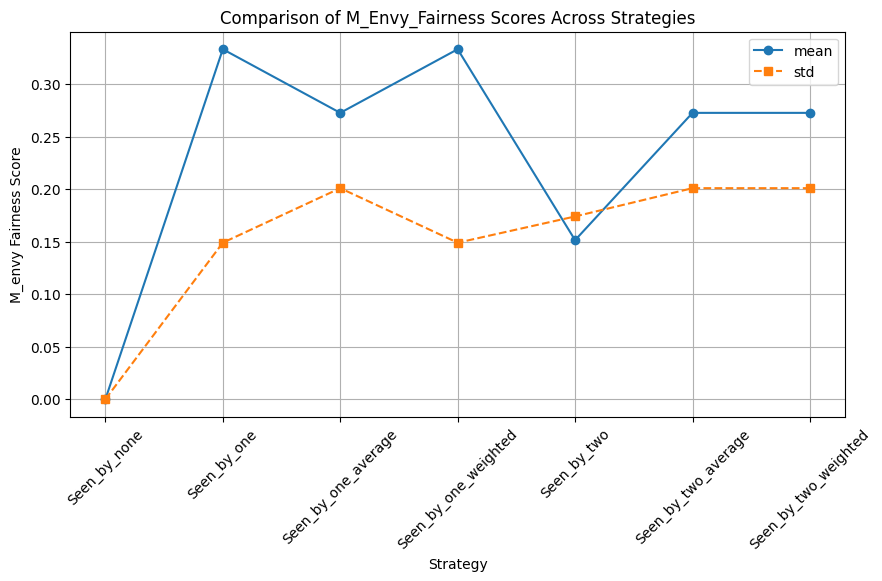

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the provided tables
mean = {
    "Strategy": [
        "Seen_by_none", "Seen_by_one", "Seen_by_one_average", "Seen_by_one_weighted",
        "Seen_by_two", "Seen_by_two_average", "Seen_by_two_weighted"
    ],
    "M_envy_Fairness_Score": [0.000000, 0.333333, 0.272727, 0.333333, 0.151515, 0.272727, 0.272727]
}

std = {
    "Strategy": [
        "Seen_by_none", "Seen_by_one", "Seen_by_one_average", "Seen_by_one_weighted",
        "Seen_by_two", "Seen_by_two_average", "Seen_by_two_weighted"
    ],
    "M_envy_Fairness_Score": [0.000000, 0.149071, 0.201008, 0.149071, 0.174078, 0.201008, 0.201008]
}

# Convert to DataFrames
df1 = pd.DataFrame(mean)
df2 = pd.DataFrame(std)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df1["Strategy"], df1["M_envy_Fairness_Score"], marker='o', linestyle='-', label="mean")
plt.plot(df2["Strategy"], df2["M_envy_Fairness_Score"], marker='s', linestyle='--', label="std")

# Formatting
plt.xlabel("Strategy")
plt.ylabel("M_envy Fairness Score")
plt.title("Comparison of M_Envy_Fairness Scores Across Strategies")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


#8.Paper icdm-2016 GR-INC UP-INC

##GR-INC

Ο GR-INC αλγόριθμος συνδυάζει τις φάσεις I2G και P2G επαναληπτικά.

Στην φάση **I2G** υπολογίζεται η πιθανότητα κάθε αντικειμένου να επιλεγεί από το group βασιζόμενος στις ατομικές προτάσεις του κάθε χρήστη. Χρησιμοποείται η εξίσωση (2) ,δηλαδή η πιθανότητα ενός αντικιεμένου να επιλεχθέι είναι ένα σταθμισμένο άθροισμα όλων των πιθανοτήτων κάθε χρήστη του group με βάρος την εμπειρία κάθε χρήστη στην κατηγορία που ανήκει το αντικείμενο που εξετάζεται.

Στην φάση **P2G** συνδυάζονται τα αντικείμενα που επιλέχθηκαν σε πακέτα.Λαμβάνει υπόψη του 3 παράγοντες.



1.   Τις προτιμήσεις των χρηστών
2.   Δικαιοσύνη μεταξύ των μελών
3.   Βιωσιμότητα του πακέτου ( Pr(I, V | U, C) )


Τέλος διατηρεί τα κορυφάια k πακέτα στην λίστα αποτελεσμάτων



In [ ]:
# def calculate_item_to_group_probabillities(group, user_ratings):
#   i2g_prob=defaultdict(list) #track id as a key rating value as a value
#   group_probabillities={}
#   for user in group:

#     #Compute P(i|u) for every user
#     user_data=df[df['username']==user]
#     total_rating=user_data['rating'].sum()

#     for _,row in user_data.iterrows():
#       track_id=row['track_id']
#       rating=row['rating']

#       #assuming equal activity for simplicity
#       prob_i_given_u=(1/3)*rating
#       i2g_prob[track_id].append(prob_i_given_u)
#       #print(track_id,rating)

#   #calculate total propabillity for the group P(i|u) as the average of the probs
#   #of the users in the group
#   for track_id,probs in i2g_prob.items():
#     group_probabillities[track_id]=sum(probs)/len(probs)


#   return group_probabillities







In [ ]:
# def gr_inc_recommendations(group, user_ratings, top_k):
#
#   i2g_prob=calculate_item_to_group_probabillities(group, user_ratings)

#   #ranking
#   ranked_items=sorted(i2g_prob.items(),key=lambda x:x[1],reverse=True)
#   #print(ranked_items)

#   #recommend the top_k
#   top_k_items=ranked_items[:top_k]

#   return top_k_items

In [ ]:
# group=groups[0]
# recommendations=gr_inc_recommendations(group,df, top_k=8)
# print(f"recommendations for group 0:{recommendations}")



In [ ]:
def group_items_by_genre(df):

  #group the songs based on genre
  items_by_category=df.groupby('track_genres')['track_id'].apply(list).to_dict()
  return items_by_category


In [ ]:
items=print(group_items_by_genre(combined_df))

{"('acoustic', 'blues')": [848, 848, 848], "('acoustic', 'folk')": [1989], "('acoustic', 'grunge')": [3369], "('acoustic', 'piano')": [386, 386, 386], "('acoustic',)": [398, 507, 528, 644, 699, 824, 825, 1016, 1394, 398, 1597, 1822, 824, 825, 2373, 2404, 398, 2516, 1016, 2594, 2654, 824, 825, 398, 824, 825, 2404, 2766, 2516, 824, 825, 507, 528, 2904, 398, 1016, 2404, 699, 824, 825, 528, 3132, 507, 824, 825], "('afrobeat', 'brazil')": [928, 928, 928], "('afrobeat', 'dub')": [2110, 2110, 2110, 3217], "('afrobeat',)": [642, 761, 1133, 1165, 1488, 1489, 1548, 1721, 1877, 2015, 2109, 2268, 2281, 2462, 2463, 2480, 2109, 2268, 2528, 1165, 1489, 1133, 2268, 2528, 2706, 2719, 1548, 2462, 2463, 2015, 1133, 3024, 2268, 2109, 1489, 2268, 1165, 2109, 3205, 3206, 3207, 1877, 2268, 1489, 3353, 3354, 3355, 3356], "('alt-rock', 'alt-rock', 'alternative', 'funk', 'metal', 'rock')": [1924, 1924, 1924, 1924], "('alt-rock', 'alternative')": [77, 151, 173, 178, 197, 531, 559, 561, 619, 621, 683, 996, 997, 1

In [ ]:
#Compute P(i|U,ci) for each item
def compute_item_to_group_probability(group, items, user_ratings):
  probabillities={}
  for item in items:

    #assuming equal probs for every user
    prob=sum(user_ratings[(user_ratings['username']==user)
                        & (user_ratings['track_id']==item)]['rating'].sum() *1/3
             for user in group)

    #print(prob)
    probabillities[item]=prob
    #print(probabillities)

  #normalize the probabilities
  total_prob=sum(probabillities.values())
  for item in probabillities:
    probabillities[item]/=total_prob
  return probabillities

In [ ]:
# Incremental I2G
def gr_inc_i2g(group, items_by_category, user_ratings, k):
    """
    Υπολογίζει τα top-k τραγούδια για κάθε κατηγορία σε μια ομάδα.
    """
    category_probabilities = {}
    for category, items in items_by_category.items():
        #print(category, items) #alt-rock [2594.0, 2207.0]
        probabilities = compute_item_to_group_probability(group, items, user_ratings)
        #print(f"probabilieties for category {category}={probabilities}")

        #sorted probabilieties in descending order
        sorted_probs= sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
        category_probabilities[category] = sorted_probs[:k]
    return category_probabilities



In [ ]:
from itertools import product

#GR-INC implementation
def gr_inc(group, user_ratings, k):

    #group tracks by genre
    items_by_category = group_items_by_genre(user_ratings)
    categories = list(items_by_category.keys())

    # I2G Phase: compute top-k packages from every category to  make the packages
    category_top_items = gr_inc_i2g(group, items_by_category, user_ratings, k)

    # P2G Phase: Making packages
    packages = []
    for package in product(*(category_top_items[cat] for cat in categories)):
      #use cartesian product
      #to do all the possible combinations  from top items per caegory
        #print(category_top_items[cat] for cat in categories)()
        package_items = [item for item, _ in package] #extract item ignoring the score
        package_score = sum(score for _, score in package) #extract score ignoring the item
        packages.append((package_items, package_score))

    #select only the top-k packages
    packages.sort(key=lambda x: x[1], reverse=True)
    return packages[:k]

In [ ]:
group = groups[0]
for user in group:


    user_data=df[df['username']==user]
    user_ratings=user_data[['username', 'track_id','track_genre' ,'rating']]

top_k =4
top_k_packages=gr_inc(group, user_ratings, top_k)
print("Top-k Packages for GR-INC:")
for package in top_k_packages:
    print(f"Tracks: {package[0]}, Score: {package[1]:.2f}")

NameError: name 'groups' is not defined

##UP-INC

Βήματα αλγορίθμου

1. Επιλογή αντιπροσωπευτικού χρήστη: Ο αλγόριθμος επιλέγει έναν αντιπροσωπευτικό χρήστη για την ομάδα, οποίος θα αποφασίσει για το πακέτο. Η πιθανότητα επιλογής αυτού του χρήστη υπολογίζεται με βάση την επιρροή του σε όλες τις κατηγορίες αντικειμένων.

2. Υπολογισμός Πιθανοτήτων: Ο UP-INC υπολογίζει την πιθανότητα ενός πακέτου να επιλεγεί από τον αντιπροσωπευτικό χρήστη, χρησιμοποιώντας τις προτιμήσεις του για τα αντικείμενα που περιλαμβάνονται στο πακέτο. Αυτό γίνεται με την εξίσωση:
Pr(I∣U,C)=∑u∈U​Pr(u∣U,C)⋅Pr(I∣u,C)
όπου Pr(I∣u,C) είναι η πιθανότητα επιλογής του πακέτου από τον χρήστη u.

3. Δύο κύριες φάσεις:

   **P2U phase:** Για κάθε χρήστη υπολογίζει τις πιθανότητες επιλογής των πακέτων

   **I2G phase:** Συνδυάζει τις πιθανότητες για να βρει τα καλύτερα πακέτα για την ομάδα

4. Αποτελεσματικότητα: Ο UP-INC είναι
   σχεδιασμένος να είναι πιο αποδοτικός από τον UP-BA, καθώς υπολογίζει τις πιθανότητες με έναν πιο στοχευμένο και σταδιακό τρόπο, μειώνοντας την υπολογιστική πολυπλοκότητα.

In [ ]:
def calculate_user_influence(user,category_items):
  #print(category_items.head(5))
  user_category_ratings=category_items[category_items['username']==user]['rating'].count()
  total_category_ratings=category_items['rating'].count()
  return user_category_ratings/total_category_ratings if total_category_ratings>0 else 0

In [ ]:
def calculate_package_probability(user, package, category_items):
  """
  Υπολογίζει την πιθανότητα ενός πακέτου να επιλεγεί από τον χρήστη.
  """
  total_prob = 1
  for item in package:
    item_rating = category_items[(category_items['username'] == user)
                               & (category_items['track_id'] == item)]['rating'].mean()
    if not np.isnan(item_rating):
      total_prob *= item_rating
    else:
      total_prob = 0.01 #low possibility for this item , which is not rated
      #break;
  return total_prob

In [ ]:
def combine_user_package_probabilities(group, package, category_items):
    #combine user probabilities to calculate the probability of the package
    total_prob = 0
    total_influence = 0
    for user in group:
        influence = calculate_user_influence(user, category_items)
        user_prob = calculate_package_probability(user, package, category_items)
        total_prob += influence * user_prob
        total_influence += influence
    return total_prob / total_influence if total_influence > 0 else 0


**Διαφορά GR-INC με τον UP-INC**

Ο αλγόριθμος GR-INC βασίζεται σε ένα μοντέλο που επιλέγει αντικέιμνα ανεξάρτητα, εστιάζοντας στις προτιμήσεις ενός αντιπροσωπευτικού χρήστη. Ο χρήστης αυτός επιλέγεται με βάση την εμπειρία του και την επιρροή του στην κατηγορία των αντικειμένων. Αντίθετα ο UP-INC επιλέγει πρώτα έναν αντιπροσωπευτικό χρήστη για την ομάδα και στην συνέχεια αυτός ο χρήστης αποφασίζει για ολόκληρο το πακέτο. Η επιλογή των αντικειμένων γίνεται με βάση τις προτιμήσεις αυτού του χρήστη και η επιρροή του υπολογίζεται σε σχέση με όλες τις κατηγορίες αντικειμένων.  


In [ ]:
def up_inc(group, user_ratings, k):
    #group items by category
    items_by_category=group_items_by_genre(user_ratings)
    categories=list(items_by_category.keys())

    package_probabilities=[]

  # P2U Phase: Υπολογισμός πιθανότητας πακέτων για κάθε χρήστη
    for user in group:
        user_probabilities = []
        for category, items in items_by_category.items():
            for item in items:
                prob = calculate_package_probability(user, [item], user_ratings)
                heapq.heappush(user_probabilities, (-prob, item))



        #select k top items for the user
        user_top_items=[heapq.heappop(user_probabilities)[1] for _ in range(min(k, len(user_probabilities)))]
        package_probabilities.append((user,user_top_items))
    print(f"User {user} top items: {user_top_items}")
    #P2G phase:Combine packages for th group
    final_packages=[]
    seen_packages=set()
    for package_comb in product(*(user_top for _, user_top in package_probabilities)):
      package_items=tuple(sorted(set(item for item in package_comb))) #sorted unique items
      if package_items in seen_packages:
       continue
      seen_packages.add(package_items)
      package_score=combine_user_package_probabilities(group, package_items, user_ratings)
      final_packages.append((package_items,package_score))
      #print(f"Package:{package}, Score:{score}")
    #print(f"Seen packages:{len(seen_packages)}")

    final_packages.sort(key=lambda x:x[1],reverse=True)
    return final_packages[:k]



In [ ]:
group = groups[0]
user_data = df[df['username'].isin(group)]
top_k = 4

top_k_packages = up_inc(group, user_data, top_k)

print("Top-k Packages for UP-INC:")
for i, (package, score) in enumerate(top_k_packages):
    print(f"Package {i + 1}: Tracks: {package}, Score: {score:.2f}")
